# **Supply Chain Analysis & Segmentation**

supply_chain_Facebook_cover_photo.6180387cbecfa.avif

## **Introduction**

supply chain refers to the network of organizations, individuals, activities,
information, and resources involved in the creation and delivery of a product or service to the end consumer. It encompasses all the steps and processes involved in sourcing raw materials, transforming them into finished products, and distributing them to customers.

Supply chains involve a complex network of entities like suppliers, manufacturers, distributors, retailers, and customers. Machine learning techniques can help analyze large volumes of supply chain data to uncover valuable insights and optimize processes.

Some key applications include :

1.   Demand Forecasting
2.   Supply Planning

1.   Route Optimization
2.   Predictive Maintenance

1.   Customer Segmentation












This project focuses on segmenting customers within a supply chain ecosystem by leveraging RFM (Recency, Frequency, Monetary) analysis and clustering algorithms. RFM analysis quantifies customer engagement based on three key factors: how recently a customer made a purchase, how frequently they purchase, and how much they spend. The resulting RFM scores, along with other relevant customer attributes like demographics and product preferences, will be used as input features for clustering algorithm. These algorithms will group customers into natural segments based on their overall characteristics and purchasing behaviors. The identified customer segments can then be analyzed to understand their unique needs, preferences, and purchasing patterns, enabling businesses to tailor marketing strategies, product offerings, and supply chain operations accordingly. Optimizing operations for specific customer segments can potentially enhance customer satisfaction and drive higher profitability within the supply chain.

For the analysis, DataCo Global's DataSet of Supply Chains was utilized. The supply chain dataset that makes machine learning algorithms possible to employ.

The Key Features Includes :

*   'Type' -  payment method or transaction type for each order

*   'Days for shipping (real)' - The actual number of days taken to ship the order.

*   'Days for shipment (scheduled)' - The scheduled/expected number of days for shipment.

*   'Benefit per order' - The profit or benefit earned per order.
*   'Sales per customer' - The total sales amount for each customer.


*   'Delivery Status' - Whether the order was delivered on time or not.


*   'Late_delivery_risk' - The risk factor associated with late deliveries.

*   'Category Id' - A unique identifier for each product category.

*   'Category Name' - The name of the product category

*   'Customer City/Country/Email/Fname/Id/Lname/Password/Segment/State/Street/Zipcode' - Various fields capturing customer information.
*   'Department Id/Name' - Identifiers and names for different departments.


*   'Latitude/Longitude' - Geographic coordinates, likely for customer locations

*   'Market' - The market segment the customer belongs to.
*   'Order City/Country/Customer Id' - Details about the order, including customer ID.


*   'order date (DateOrders)' - The date when the order was placed.
*   'Order Id' - A unique identifier for each order.

*   'Order Item Cardprod Id/Discount/Discount Rate/Id/Product Price/Profit Ratio/Quantity' - Information specific to each product item in the order.

*   'Sales' - The total sales amount for the order.
*   'Order Item Total' - The total amount for each order item.


*   'Order Profit Per Order' - The profit earned per order.

*   'Order Region/State/Status/Zipcode' - Additional details about the order location and status.

*   'Product Card Id/Category Id/Description/Image/Name/Price/Status' - Various attributes related to the products ordered.
*   'shipping date (DateOrders)' - The date when the order was shipped.


*   'Shipping Mode' - The mode of transportation used for shipping the order.












In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings("ignore")
df = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding_errors="ignore")
df

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0          DEBIT                         3                              4   
1       TRANSFER                         5                              4   
2           CASH                         4                              4   
3          DEBIT                         3                              4   
4        PAYMENT                         2                              4   
...          ...                       ...                            ...   
180514      CASH                         4                              4   
180515     DEBIT                         3                              2   
180516  TRANSFER                         5                              4   
180517   PAYMENT                         3                              4   
180518   PAYMENT                         4                              4   

        Benefit per order  Sales per customer   Delivery Status  \
0               91.250000          314.640015  Advance shipping   
1             -249.089996          311.359985     Late delivery   
2             -247.779999          309.720001  Shipping on time   
3               22.860001          304.809998  Advance shipping   
4              134.210007          298.250000  Advance shipping   
...                   ...                 ...               ...   
180514          40.000000          399.980011  Shipping on time   
180515        -613.770019          395.980011     Late delivery   
180516         141.110001          391.980011     Late delivery   
180517         186.229996          387.980011  Advance shipping   
180518         168.949997          383.980011  Shipping on time   

        Late_delivery_risk  Category Id   Category Name Customer City  \
0                        0           73  Sporting Goods        Caguas   
1                        1           73  Sporting Goods        Caguas   
2                        0           73  Sporting Goods      San Jose   
3                        0           73  Sporting Goods   Los Angeles   
4                        0           73  Sporting Goods        Caguas   
...                    ...          ...             ...           ...   
180514                   0           45         Fishing      Brooklyn   
180515                   1           45         Fishing   Bakersfield   
180516                   1           45         Fishing       Bristol   
180517                   0           45         Fishing        Caguas   
180518                   0           45         Fishing        Caguas   

       Customer Country Customer Email Customer Fname  Customer Id  \
0           Puerto Rico      XXXXXXXXX          Cally        20755   
1           Puerto Rico      XXXXXXXXX          Irene        19492   
2               EE. UU.      XXXXXXXXX        Gillian        19491   
3               EE. UU.      XXXXXXXXX           Tana        19490   
4           Puerto Rico      XXXXXXXXX           Orli        19489   
...                 ...            ...            ...          ...   
180514          EE. UU.      XXXXXXXXX          Maria         1005   
180515          EE. UU.      XXXXXXXXX         Ronald         9141   
180516          EE. UU.      XXXXXXXXX           John          291   
180517      Puerto Rico      XXXXXXXXX           Mary         2813   
180518      Puerto Rico      XXXXXXXXX         Andrea         7547   

       Customer Lname Customer Password Customer Segment Customer State  \
0            Holloway         XXXXXXXXX         Consumer             PR   
1                Luna         XXXXXXXXX         Consumer             PR   
2           Maldonado         XXXXXXXXX         Consumer             CA   
3                Tate         XXXXXXXXX      Home Office             CA   
4           Hendricks         XXXXXXXXX        Corporate             PR   
...               ...               ...              ...            ...   
180514       Peterson         XXXXXXXXX

In [ ]:
df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  Customer Country Customer Email Customer Fname  Customer Id Customer Lname  \
0      Puerto Rico      XXXXXXXXX          Cally        20755       Holloway   
1      Puerto Rico      XXXXXXXXX          Irene        19492           Luna   
2          EE. UU.      XXXXXXXXX        Gillian        19491      Maldonado   
3          EE. UU.      XXXXXXXXX           Tana        19490           Tate   
4      Puerto Rico      XXXXXXXXX           Orli        19489      Hendricks   

  Customer Password Customer Segment Customer State           Customer Street  \
0         XXXXXXXXX         Consumer             PR  5365 Noble Nectar Island   
1         XXXXXXXXX         Consumer             PR          2679 Rustic Loop   
2         XXXXXXXXX         Consumer             CA      8510 Round Bear Gate   
3         XXXXXXXXX      Home Office             CA           3200 Amber Bend   
4         XXXXXXXXX        Corporate             PR  8671 Iron Anchor Corners   

   Customer Zipcode  Department Id Department Name   Latitude   Longitude  \
0             725.0              2         Fitness  18.251453  -66.037056   
1             725.0              2         Fitness  18.279451  -66.037064   
2           95125.0              2         Fitness  37.292233 -121.881279   
3           90027.0              2         Fitness  34.125946 -118.291016   
4             725.0              2         Fitness  18.253769  -66.037048   

         Market  Order City Order Country  Order Customer Id  \
0  Pacific Asia      Bekasi     Indonesia              20755   
1  Pacific Asia     Bikaner         India              19492   
2  Pacific Asia     Bikaner         India              19491   
3  Pacific Asia  Townsville     Australia              19490   
4  Pacific Asia  Townsville     Australia              19489   

  order date (DateOrders)  Order Id  Order Item Cardprod Id  \
0         1/31/2018 22:56     77202                    1360   
1         1/13/2018 12:27     75939                    1360   
2         1/13/2018 12:06     75938                    1360   
3         1/13/2018 11:45     75937                    1360   
4         1/13/2018 11:24     75936                    1360   

   Order Item Discount  Order Item Discount Rate  Order Item Id  \
0            13.110000                      0.04         180517   
1            16.389999                      0.05         179254   
2            18.030001                      0.06         179253   
3            22.940001                      0.07         179252   
4            29.500000                      0.09         179251   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75                     0.29                    1   
1                    327.75             

In [ ]:
df.tail()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
180514      CASH                         4                              4   
180515     DEBIT                         3                              2   
180516  TRANSFER                         5                              4   
180517   PAYMENT                         3                              4   
180518   PAYMENT                         4                              4   

        Benefit per order  Sales per customer   Delivery Status  \
180514          40.000000          399.980011  Shipping on time   
180515        -613.770019          395.980011     Late delivery   
180516         141.110001          391.980011     Late delivery   
180517         186.229996          387.980011  Advance shipping   
180518         168.949997          383.980011  Shipping on time   

        Late_delivery_risk  Category Id Category Name Customer City  \
180514                   0           45       Fishing      Brooklyn   
180515                   1           45       Fishing   Bakersfield   
180516                   1           45       Fishing       Bristol   
180517                   0           45       Fishing        Caguas   
180518                   0           45       Fishing        Caguas   

       Customer Country Customer Email Customer Fname  Customer Id  \
180514          EE. UU.      XXXXXXXXX          Maria         1005   
180515          EE. UU.      XXXXXXXXX         Ronald         9141   
180516          EE. UU.      XXXXXXXXX           John          291   
180517      Puerto Rico      XXXXXXXXX           Mary         2813   
180518      Puerto Rico      XXXXXXXXX         Andrea         7547   

       Customer Lname Customer Password Customer Segment Customer State  \
180514       Peterson         XXXXXXXXX      Home Office             NY   
180515          Clark         XXXXXXXXX        Corporate             CA   
180516          Smith         XXXXXXXXX        Corporate             CT   
180517          Smith         XXXXXXXXX         Consumer             PR   
180518         Ortega         XXXXXXXXX         Consumer             PR   

                   Customer Street  Customer Zipcode  Department Id  \
180514            1322 Broad Glade           11207.0              7   
180515       7330 Broad Apple Moor           93304.0              7   
180516          97 Burning Landing            6010.0              7   
180517  2585 Silent Autumn Landing             725.0              7   
180518           697 Little Meadow             725.0              7   

       Department Name   Latitude   Longitude        Market Order City  \
180514        Fan Shop  40.640930  -73.942711  Pacific Asia    Shanghi   
180515        Fan Shop  35.362545 -119.018700  Pacific Asia   Hirakata   
180516        Fan Shop  41.629959  -72.967155  Pacific Asia   Adelaide   
180517        Fan Shop  18.213350  -66.370575  Pacific Asia   Adelaide   
180518        Fan Shop  18.290380  -66.370613  Pacific Asia  Nagercoil   

       Order Country  Order Customer Id order date (DateOrders)  Order Id  \
180514         China               1005          1/16/2016 3:40     26043   
180515          Japn               9141          1/16/2016 1:34     26037   
180516     Australia                291         1/15/2016 21:00     26024   
180517     Australia               2813         1/15/2016 20:18     26022   
180518         India               7547         1/15/2016 18:54     26018   

        Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  \
180514                    1004                  0.0                      0.00   
180515                    1004                  4.0                      0.01   
180516                    1004                  8.0                      0.02   
180517                    1004                 12.0                      0.03   
180518                    1004                 16.0                      0.04   

        Order Item Id  Or

In [ ]:
df.shape

(180519, 53)

In [ ]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [ ]:
df.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [ ]:
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [ ]:
df.describe()

Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
std                    1.623722                       1.374449   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
std           104.433526          120.043670            0.497664   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000   
50%            31.520000          163.990005            1.000000   
75%            64.800003          247.399994            1.000000   
max           911.799988         1939.989990            1.000000   

         Category Id    Customer Id  Customer Zipcode  Department Id  \
count  180519.000000  180519.000000     180516.000000  180519.000000   
mean       31.851451    6691.379495      35921.126914       5.443460   
std        15.640064    4162.918106      37542.461122       1.629246   
min         2.000000       1.000000        603.000000       2.000000   
25%        18.000000    3258.500000        725.000000       4.000000   
50%        29.000000    6457.000000      19380.000000       5.000000   
75%        45.000000    9779.000000      78207.000000       7.000000   
max        76.000000   20757.000000      99205.000000      12.000000   

            Latitude      Longitude  Order Customer Id       Order Id  \
count  180519.000000  180519.000000      180519.000000  180519.000000   
mean       29.719955     -84.915675        6691.379495   36221.894903   
std         9.813646      21.433241        4162.918106   21045.379569   
min       -33.937553    -158.025986           1.000000       1.000000   
25%        18.265432     -98.446312        3258.500000   18057.000000   
50%        33.144863     -76.847908        6457.000000   36140.000000   
75%        39.279617     -66.370583        9779.000000   54144.000000   
max        48.781933     115.263077       20757.000000   77204.000000   

       Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  \
count           180519.000000        180519.000000             180519.000000   
mean               692.509764            20.664741                  0.101668   
std                336.446807            21.800901                  0.070415   
min                 19.000000             0.000000                  0.000000   
25%                403.000000             5.400000                  0.040000   
50%                627.000000            14.000000                  0.100000   
75%               1004.000000            29.990000                  0.160000   
max               1363.000000           500.000000                  0.250000   

       Order Item Id  Order Item Product Price  Order Item Profit Ratio  \
count  180519.000000             180519.000000            180519.000000   
mean    90260.000000                141.232550                 0.120647   
std     52111.490959                139.732492                 0.466796   
min         1.000000                  9.990000                -2.750000   
25%     45130.500000                 50.000000                 0.080000   
50%     90260.000000                 59.990002                 0.270000   
75%    135389.500000                199.990005                 0.360000   
max    180519.000000               1999.989990                 0.500000   

       Order Item Quantity          Sales  Order Item Total  \
count        180519.000000  1805

In [ ]:
df.describe(include='object')

Type Delivery Status Category Name Customer City Customer Country  \
count   180519          180519        180519        180519           180519   
unique       4               4            50           563                2   
top      DEBIT   Late delivery        Cleats        Caguas          EE. UU.   
freq     69295           98977         24551         66770           111146   

       Customer Email Customer Fname Customer Lname Customer Password  \
count          180519         180519         180511            180519   
unique              1            782           1109                 1   
top         XXXXXXXXX           Mary          Smith         XXXXXXXXX   
freq           180519          65150          64104            180519   

       Customer Segment Customer State          Customer Street  \
count            180519         180519                   180519   
unique                3             46                     7458   
top            Consumer             PR  9126 Wishing Expressway   
freq              93504          69373                      122   

       Department Name  Market     Order City   Order Country  \
count           180519  180519         180519          180519   
unique              11       5           3596             164   
top           Fan Shop   LATAM  Santo Domingo  Estados Unidos   
freq             66861   51594           2211           24840   

       order date (DateOrders)     Order Region Order State Order Status  \
count                   180519           180519      180519       180519   
unique                   65752               23        1089            9   
top           12/14/2016 12:29  Central America  Inglaterra     COMPLETE   
freq                         5            28341        6722        59491   

                                            Product Image  \
count                                              180519   
unique                                                118   
top     http://images.acmesports.sports/Perfect+Fitnes...   
freq                                                24515   

                            Product Name shipping date (DateOrders)  \
count                             180519                     180519   
unique                               118                      63701   
top     Perfect Fitness Perfect Rip Deck              1/5/2016 5:58   
freq                               24515                         10   

         Shipping Mode  
count           180519  
unique               4  
top     Standard Class  
freq            107752

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

## **Exploring Object and Nemerical Columns**

In [ ]:
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Region', 'Order State', 'Order Status', 'Product Image',
       'Product Name', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [ ]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical_columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id',
       'Latitude', 'Longitude', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Zipcode',
       'Product Card Id', 'Product Category Id', 'Product Description',
       'Product Price', 'Product Status'],
      dtype='object')

In [ ]:
df.nunique()

Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927
Delivery Status                       4
Late_delivery_risk                    2
Category Id                          51
Category Name                        50
Customer City                       563
Customer Country                      2
Customer Email                        1
Customer Fname                      782
Customer Id                       20652
Customer Lname                     1109
Customer Password                     1
Customer Segment                      3
Customer State                       46
Customer Street                    7458
Customer Zipcode                    995
Department Id                        11
Department Name                      11
Latitude                          11250
Longitude                          4487
Market                                5


## **Renaming Columns**

In [ ]:
df.rename(columns={'Customer Segment':'customer category'},inplace=True)

## **Handling Missing Values**

In [ ]:
# Handling missing values

In [ ]:
df.drop(['Order Zipcode','Product Description'],axis=1,inplace=True)

df.dropna(subset=['Customer Lname', 'Customer Zipcode'], inplace=True)


df.isna().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Password                0
customer category                0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrde

## **Replacing Special Charectors**

In [ ]:
df.replace({'Order Item Discount':'[\s,?]','Order Item Product Price':'[\s,?]','Product Price':'[\s,?]','Order Profit Per Order':'[\s,?]'},'',regex=True,inplace=True)
df['Product Price'].astype('float')
df['Order Item Discount'].astype('float')
df['Order Item Product Price'].astype('float')
df['Order Profit Per Order'].astype('float')

df['Product Price'] = pd.to_numeric(df['Product Price'], errors='coerce')
df['Order Item Discount'] = pd.to_numeric(df['Order Item Discount'], errors='coerce')
df['Order Item Product Price'] = pd.to_numeric(df['Order Item Product Price'], errors='coerce')
df['Order Profit Per Order'] = pd.to_numeric(df['Order Profit Per Order'], errors='coerce')

## **Changing Data Type**

In [ ]:
# changing data type

In [ ]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'],errors='coerce')
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'],errors='coerce')


## **Feature Extraction**

In [ ]:
# extracting year,month,day

In [ ]:
df['order_yr']= pd.DatetimeIndex(df['order date (DateOrders)']).year
df['order_month'] = pd.DatetimeIndex(df['order date (DateOrders)']).month
df['order_day'] = pd.DatetimeIndex(df['order date (DateOrders)']).weekday

df['ship_yr'] = pd.DatetimeIndex(df['shipping date (DateOrders)']).year
df['ship_month'] = pd.DatetimeIndex(df['shipping date (DateOrders)']).month
df['ship_day'] = pd.DatetimeIndex(df['shipping date (DateOrders)']).weekday

### **Creating New Column**

In [ ]:
# Calculating Shipment Duration Based on Order and Shipment Dates
df['Order_Shipment_Duration'] = df['shipping date (DateOrders)'] - df['order date (DateOrders)']

# Convert the timedelta difference to days
df['Order_Shipment_Duration'] = df['Order_Shipment_Duration'].dt.days

df['Order_Shipment_Duration'].value_counts()


Order_Shipment_Duration
2    56613
3    28764
6    28723
4    28510
5    28161
0     9737
Name: count, dtype: int64

In [ ]:
# replacing special charectors

## **Exploring Shipment and Finance Features**

In [ ]:
# exploring shipment features

In [ ]:
shipment_features = ['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Benefit per order',
                        'Sales per customer','Latitude','Longitude','Shipping Mode','Order Status','Order Region',
                        'Order Country','Order City','Market','Delivery Status']
shipment = df[shipment_features]
shipment.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Late_delivery_risk  Benefit per order  Sales per customer   Latitude  \
0                   0          91.250000          314.640015  18.251453   
1                   1        -249.089996          311.359985  18.279451   
2                   0        -247.779999          309.720001  37.292233   
3                   0          22.860001          304.809998  34.125946   
4                   0         134.210007          298.250000  18.253769   

    Longitude   Shipping Mode     Order Status    Order Region Order Country  \
0  -66.037056  Standard Class         COMPLETE  Southeast Asia     Indonesia   
1  -66.037064  Standard Class          PENDING      South Asia         India   
2 -121.881279  Standard Class           CLOSED      South Asia         India   
3 -118.291016  Standard Class         COMPLETE         Oceania     Australia   
4  -66.037048  Standard Class  PENDING_PAYMENT         Oceania     Australia   

   Order City        Market   Delivery Status  
0      Bekasi  Pacific Asia  Advance shipping  
1     Bikaner  Pacific Asia     Late delivery  
2     Bikaner  Pacific Asia  Shipping on time  
3  Townsville  Pacific Asia  Advance shipping  
4  Townsville  Pacific Asia  Advance shipping

In [ ]:
# exploring finance features

In [ ]:
finance_features=['Benefit per order','Sales per customer','Order Item Discount','Order Item Discount Rate',
                  'Order Item Product Price','Order Item Profit Ratio']
finance = df[finance_features]
finance.head()

Benefit per order  Sales per customer  Order Item Discount  \
0          91.250000          314.640015            13.110000   
1        -249.089996          311.359985            16.389999   
2        -247.779999          309.720001            18.030001   
3          22.860001          304.809998            22.940001   
4         134.210007          298.250000            29.500000   

   Order Item Discount Rate  Order Item Product Price  Order Item Profit Ratio  
0                      0.04                    327.75                     0.29  
1                      0.05                    327.75                    -0.80  
2                      0.06                    327.75                    -0.80  
3                      0.07                    327.75                     0.08  
4                      0.09                    327.75                     0.45

In [ ]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'customer category',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Image',
       'Product N

## **RFM Analysis**

RFM analysis is a way to segment customers. This segmentation helps us to identify our most valuable customer



*   r-recency : How recently a customer has made a purchase

*   f-frequency : How often a customer makes a purchase

*   m-monetary : How much money a customer spends on purchases






The more recent the purchase, more responsive the customer is to promotions The more frequently the customer buys, the more engaged and satisfied the customer are. The monetary values helps us to distinguish between big spenders and low spenders.

In [ ]:
# calculating Frequency

In [ ]:
sns.set()

In [ ]:
dF_frequency=df.groupby(["Customer Id"]).agg(Total_count=("Order Id","nunique"))

#This line groups the DataFrame by the "Customer Id" column and calculates the number of unique "Order Id" values for each customer.
#The result is a new DataFrame dF_frequency with two columns: "Customer Id" and "Total_count".

dF_frequency

Total_count
Customer Id             
1                      1
2                      4
3                      5
4                      4
5                      3
...                  ...
20753                  1
20754                  1
20755                  1
20756                  1
20757                  1

[20641 rows x 1 columns]

In [ ]:
df["Year"]=df["order date (DateOrders)"].dt.year

#This line creates a new column "Year" in the original DataFrame by extracting the year from the "order date (DateOrders)" column.

dF_frequency_year=df.groupby(["Customer Id","Year"],as_index=False)["Order Id"].nunique()

#This line groups the original DataFrame by "Customer Id" and "Year" columns, and calculates the number of unique "Order Id" values for each combination of customer and year.

dF_frequency_year

Customer Id  Year  Order Id
0                1  2015         1
1                2  2015         1
2                2  2016         1
3                2  2017         2
4                3  2015         1
...            ...   ...       ...
37616        20753  2018         1
37617        20754  2018         1
37618        20755  2018         1
37619        20756  2018         1
37620        20757  2018         1

[37621 rows x 3 columns]

In [ ]:
dF_frequency_year=dF_frequency_year.pivot_table(index="Customer Id",columns="Year",values="Order Id",fill_value=0)

#This line creates a pivot table from dF_frequency_year, with "Customer Id" as the index, "Year" as the columns, and the number of unique "Order Id" values as the values.

dF_frequency_year

Year         2015  2016  2017  2018
Customer Id                        
1               1     0     0     0
2               1     1     2     0
3               1     1     3     0
4               2     1     1     0
5               0     3     0     0
...           ...   ...   ...   ...
20753           0     0     0     1
20754           0     0     0     1
20755           0     0     0     1
20756           0     0     0     1
20757           0     0     0     1

[20641 rows x 4 columns]

In [ ]:
pd.set_option("display.max_columns",None)
df[df["Customer Id"]==12436]

Type  Days for shipping (real)  Days for shipment (scheduled)  \
33457  CASH                         5                              4   

       Benefit per order  Sales per customer Delivery Status  \
33457               2.24               25.49   Late delivery   

       Late_delivery_risk  Category Id Category Name Customer City  \
33457                   1           59        Books    Brownsville   

      Customer Country Customer Email Customer Fname  Customer Id  \
33457          EE. UU.      XXXXXXXXX           Mike        12436   

      Customer Lname Customer Password customer category Customer State  \
33457   Gulvishvokov         XXXXXXXXX          Consumer             TX   

          Customer Street  Customer Zipcode  Department Id Department Name  \
33457  6303 Heather Plaza           78521.0              8       Book Shop   

        Latitude  Longitude  Market Order City Order Country  \
33457  25.961628 -97.577255  Europe    Trieste        Italia   

       Order Customer Id order date (DateOrders)  Order Id  \
33457              12436     2017-10-02 12:46:00     68884   

       Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  \
33457                    1346                 5.59                      0.18   

       Order Item Id  Order Item Product Price  Order Item Profit Ratio  \
33457         172199                     31.08                     0.09   

       Order Item Quantity  Sales  Order Item Total  Order Profit Per Order  \
33457                    1  31.08             25.49                    2.24   

          Order Region           Order State Order Status  Product Card Id  \
33457  Southern Europe  Friuli-Venecia Julia       CLOSED             1346   

       Product Category Id                                 Product Image  \
33457                   59  http://images.acmesports.sports/Sports+Books   

        Product Name  Product Price  Product Status  \
33457  Sports Books           31.08               0   

      shipping date (DateOrders)   Shipping Mode  order_yr  order_month  \
33457        2017-10-07 12:46:00  Standard Class      2017           10   

       order_day  ship_yr  ship_month  ship_day  Order_Shipment_Duration  Year  
33457          0     2017          10         5                        5  2017

<Axes: xlabel='Frequency', ylabel='Count'>

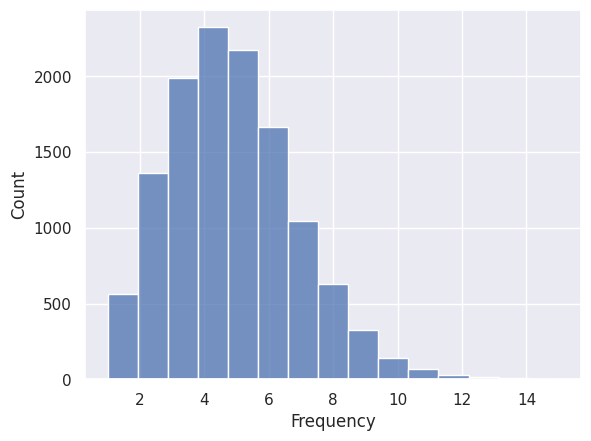

In [ ]:
import datetime


datetime_val = datetime.datetime.strptime('02-10-2017 12:46:00', '%d-%m-%Y %H:%M:%S')

# Assuming df is the DataFrame you want to work with
df = df[df["order date (DateOrders)"] < datetime_val].copy()

# Calculating frequency
df_frequency = df.groupby("Customer Id")["Order Id"].nunique().reset_index()
df_frequency.columns = ["Customer Id", "Frequency"]

# Plotting histogram
sns.histplot(df_frequency["Frequency"], bins=15, kde=False)

In [ ]:
df_frequency["F"], Intervals_Frequency = pd.qcut(df_frequency["Frequency"], q=3, labels=[1, 2,3], retbins=True)
df_frequency


Customer Id  Frequency  F
0                1          1  1
1                2          4  1
2                3          5  2
3                4          4  1
4                5          3  1
...            ...        ... ..
12326        12431         14  3
12327        12432          9  3
12328        12433          3  1
12329        12434          6  3
12330        12435          2  1

[12331 rows x 3 columns]

In [ ]:
# Grouping by 'Customer Id' and finding the maximum purchase date
dF_recency = df.groupby("Customer Id", as_index=False)["order date (DateOrders)"].max()

# Renaming the column to 'last_purchase_date'
dF_recency.rename(columns={"order date (DateOrders)": "last_purchase_date"}, inplace=True)

# Calculating recency as the difference between the maximum purchase date and the last purchase date
max_date = dF_recency["last_purchase_date"].max()
dF_recency["recency"] = (max_date - dF_recency["last_purchase_date"]).dt.days

In [ ]:
sns.displot(dF_recency.recency,bins=8,kde=False,palette='rocket')

In [ ]:
dF_recency['R'],Intervals_Recency=pd.qcut(dF_recency["recency"],q=3,labels=[3,2,1],retbins=True)
print("Interval Recency:"+f"{Intervals_Recency}")

Interval Recency:[   0.   87.  233. 1003.]


In [ ]:
dF_monetory=df[["Customer Id","Order Item Total"]].groupby("Customer Id",as_index=False).sum()
dF_monetory.columns=["Customer Id","Sum_of_Sales"]
dF_monetory["M"],Intervals_Monetory=pd.qcut(dF_monetory["Sum_of_Sales"],q=3,labels=[1,2,3],retbins=True)
Intervals_Monetory

array([  24.25      , 1805.60003672, 2941.82004556, 9436.61008833])

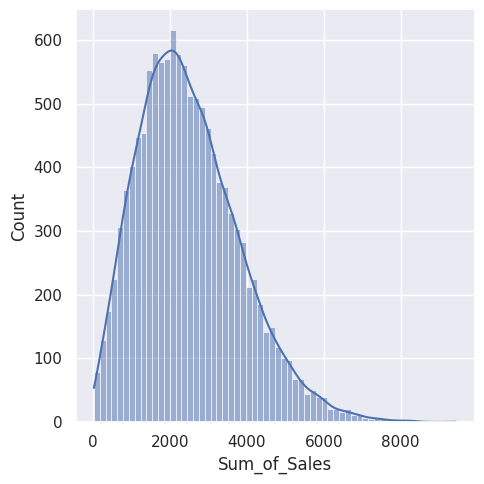

In [ ]:
sns.displot(dF_monetory.Sum_of_Sales,kde=True)

This function divides the data into bins such that each bin contains approximately the same number of observations. This is particularly useful when you want to divide your data into equal-frequency bins.

In [ ]:
dF_rfm=pd.merge(dF_recency[["Customer Id","R"]],dF_monetory[["Customer Id","M"]],on="Customer Id",how="inner")
dF_rfm=pd.merge(dF_rfm,df_frequency[["Customer Id","F"]],on="Customer Id",how="inner")
dF_rfm["RFM"]=(dF_rfm["R"]).astype(str)+(dF_rfm["F"]).astype(str)+(dF_rfm["M"]).astype(str)

In [ ]:
dF_rfm

Customer Id  R  M  F  RFM
0                1  1  1  1  111
1                2  3  1  1  311
2                3  2  3  2  223
3                4  1  1  1  111
4                5  1  1  1  111
...            ... .. .. ..  ...
12326        12431  3  3  3  333
12327        12432  2  3  3  233
12328        12433  3  1  1  311
12329        12434  2  2  3  232
12330        12435  2  1  1  211

[12331 rows x 5 columns]

In [ ]:
def Customer_Segment(data):
    if data["R"]==1 and data["F"] in [1,2,3] and (data["M"]==3):
        return "Lost Customers - Big Spenders"
    elif data["R"]== 1 and data["F"] in [1,2] and data["M"] in [1,2]:
        return "Lost Customers - Bargain"
    elif data["R"] in [1,2] and data["F"]==3 and data["M"] in [1,2]:
        return "Lost/Almost Lost Customers - Loyal"
    elif (data["R"]==3) and (data["F"]==3) and data["M"] in [1,2]:
        return "Loyal Customers"
    elif (data["R"]==3) and data["F"] in [3,2] and data["M"]==3:
        return "Big Spenders"
    elif (data["R"]==3) and (data["F"]==1) and data["M"] in [1,2,3]:
        return "New Customers"
    elif (data["R"]==3) and (data["F"]==2) and data["M"] in [1,2]:
        return "Bargain Customers"
    elif (data["R"]==2) and data["F"]==2 and data["M"] in [1,2]:
        return "Occasional Customers-Bargain"
    elif (data["R"]==2) and data["F"] in [2,3] and data["M"]==3:
        return "Occasional Customers- Big Spenders"
    elif (data["R"]==2) and data["F"]==1 and data ["M"] in [1,2,3]:
        return "Unsatisfied Customers"
    else:
        return "No Segment"

In [ ]:
dF_rfm["R"]=dF_rfm["R"].astype("category")
dF_rfm["F"]=dF_rfm["F"].astype("category")
dF_rfm["M"]=dF_rfm["M"].astype("category")
dF_rfm["Segment"]=dF_rfm.apply(Customer_Segment,axis=1)

## **Customer Segments Based On RFM Score**

In [ ]:
dF_rfm.head()

Customer Id  R  M  F  RFM                             Segment
0            1  1  1  1  111            Lost Customers - Bargain
1            2  3  1  1  311                       New Customers
2            3  2  3  2  223  Occasional Customers- Big Spenders
3            4  1  1  1  111            Lost Customers - Bargain
4            5  1  1  1  111            Lost Customers - Bargain

In [ ]:
dF_rfm['Segment'].value_counts()

Segment
Lost Customers - Bargain              3186
Unsatisfied Customers                 1823
Big Spenders                          1787
New Customers                         1482
Occasional Customers- Big Spenders    1400
Lost Customers - Big Spenders          737
Occasional Customers-Bargain           543
Bargain Customers                      506
Lost/Almost Lost Customers - Loyal     495
Loyal Customers                        372
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Segment'>

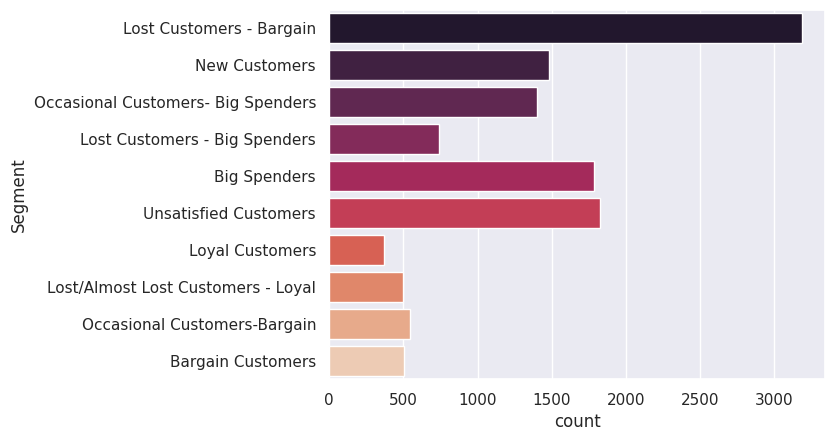

In [ ]:
sns.countplot(dF_rfm['Segment'],palette='rocket')

In [ ]:
import pandas as pd
import plotly.express as px

# Merge dataframes
df = pd.merge(df, dF_rfm[["Customer Id", "RFM", "Segment"]], on="Customer Id", how="left")

# Group by segment and calculate total revenue
dF_segment_revenue = df.groupby("Segment", as_index=False).agg(Total_Revenue=("Order Item Total", "sum")).sort_values(by="Total_Revenue", ascending=False)

# Plot
fig = px.bar(dF_segment_revenue, x="Segment", y="Total_Revenue",
             labels={"Segment": "Customer Segment", "Total_Revenue": "Revenue"},
             title="Revenue Generated by Each Segment")
fig.show()

In [ ]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'customer category',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Image',
       'Product N

In [ ]:
df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0  PAYMENT                         5                              2   
1  PAYMENT                         2                              2   
2  PAYMENT                         6                              2   
3  PAYMENT                         2                              2   
4  PAYMENT                         3                              2   

   Benefit per order  Sales per customer   Delivery Status  \
0         -30.750000          115.180000     Late delivery   
1        -122.730003           79.180000  Shipping on time   
2          33.599998           96.000000     Late delivery   
3          24.690001           75.980003  Shipping on time   
4           9.100000           91.000000     Late delivery   

   Late_delivery_risk  Category Id    Category Name Customer City  \
0                   1           17           Cleats       Bayamon   
1                   0           29    Shop By Sport        Caguas   
2                   1           24  Women's Apparel        Caguas   
3                   0           29    Shop By Sport        Caguas   
4                   1           24  Women's Apparel        Caguas   

  Customer Country Customer Email Customer Fname  Customer Id Customer Lname  \
0      Puerto Rico      XXXXXXXXX           Mary         9083          Frank   
1      Puerto Rico      XXXXXXXXX           Mary         4741          Smith   
2      Puerto Rico      XXXXXXXXX      Elizabeth          639        Pittman   
3      Puerto Rico      XXXXXXXXX      Katherine         9702          Tyler   
4      Puerto Rico      XXXXXXXXX           Mary         9114          Smith   

  Customer Password customer category Customer State  \
0         XXXXXXXXX       Home Office             PR   
1         XXXXXXXXX       Home Office             PR   
2         XXXXXXXXX       Home Office             PR   
3         XXXXXXXXX       Home Office             PR   
4         XXXXXXXXX       Home Office             PR   

               Customer Street  Customer Zipcode  Department Id  \
0             75 Sunny Grounds             957.0              4   
1        9731 Honey Fox Towers             725.0              5   
2  7573 Golden Treasure Centre             725.0              5   
3          8369 Sunny Crossing             725.0              5   
4        1425 Fallen Fox Arbor             725.0              5   

  Department Name   Latitude  Longitude        Market     Order City  \
0         Apparel  18.380119 -66.183128  Pacific Asia       Mirzapur   
1            Golf  18.235573 -66.370613  Pacific Asia          Bursa   
2            Golf  18.025368 -66.613037  Pacific Asia  Murray Bridge   
3            Golf  18.273838 -66.370636  Pacific Asia         Kartal   
4            Golf  18.284805 -66.370590  Pacific Asia     Ulan Bator   

  Order Country  Order Customer Id order date (DateOrders)  Order Id  \
0         India               9083     2016-02-24 13:57:00     28744   
1        Turqua               4741     2016-10-25 14:39:00     45461   
2     Australia                639     2016-03-30 04:37:00     31115   
3        Turqua               9702     2016-10-30 01:31:00     45766   
4      Mongolia               9114     2016-11-28 01:18:00     47752   

   Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  \
0                     365                  4.8                      0.04   
1                     627                  0.8                      0.01   
2                     502                  4.0                      0.04   
3                     627                  4.0                      0.05   
4                     502                  9.0                      0.09   

   Order Item Id  Order Item Product Price  Order Item Profit Ratio  \
0          71956                 59.990002                    -0.27   
1         113598                 39.990002                    -1.55   
2          77757                 5

## **Dropping Unwanted Features**

In [ ]:
# Dropping unwanted columns

In [ ]:
df.drop(['Days for shipping (real)','Days for shipment (scheduled)','Category Id','Customer Email','Customer Fname','Customer Lname','Customer Id',
         'Customer Password','Customer Zipcode','Department Id','Latitude','Longitude','Order Customer Id',
         'order date (DateOrders)','order date (DateOrders)','Order Id','Order Item Cardprod Id','Order Item Id',
         'Product Card Id','Product Category Id','Product Image','shipping date (DateOrders)','Year','RFM'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer City',
       'Customer Country', 'customer category', 'Customer State',
       'Customer Street', 'Department Name', 'Market', 'Order City',
       'Order Country', 'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Name', 'Product Price', 'Product Status', 'Shipping Mode',
       'order_yr', 'order_month', 'order_day', 'ship_yr', 'ship_month',
       'ship_day', 'Order_Shipment_Duration', 'Segment'],
      dtype='object')

In [ ]:
df.shape

(172198, 38)

## **Data Visualizations For Key Insights**

In [ ]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df['order_month'] = df['order_month'].map(month_mapping)
df['ship_month']=df['ship_month'].map(month_mapping)

In [ ]:
yr_profit = df.groupby(['order_yr','order_month'])['Order Profit Per Order'].sum().reset_index()


In [ ]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

sns.barplot(x='order_yr', y='Order Profit Per Order', hue='order_month', hue_order=month_order, data=yr_profit, palette='rocket')

plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Total Profit per Year with Month Variation')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Month')

plt.show()




*   The plot clearly shows distinct seasonal patterns in the total profit across different months.

*    the total profit is generally higher during the summer months (June-August) compared to the rest of the year.
*   This suggests that the business experiences peak demand and higher profitability during certain times of the year, likely due to factors like consumer purchasing behavior and seasonal trends.


*    The total profit in 2017 appears to be significantly higher than in the previous two years, indicating potential business expansion or improved operational efficiency.


*   the lower total profit during certain months may indicate a need to address supply chain issues, marketing strategies, or customer engagement to boost sales and profitability during those periods.
*   Conversely, the high-profit months can be leveraged to invest in growth, expand operations, or implement initiatives to capitalize on the increased demand.




In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Let's first group the data by 'Order_Shipment_Duration' and sum the 'Order Profit Per Order'
sales_by_duration = df.groupby('Order_Shipment_Duration')['Sales'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sales_by_duration['Order_Shipment_Duration'], sales_by_duration['Sales'], marker='o', linestyle='-')
plt.title('Average sales vs Order Shipment Duration')
plt.xlabel('Order Shipment Duration')
plt.ylabel('Average Sales')
plt.grid(True)

plt.show()




*   This suggests that for a particular product  an order shipment duration of
around 2 days is the most optimal for maximizing average sales.


*   As the order shipment duration increases beyond 2, the average sales start to decrease.This indicates that customers may be less satisfied or willing to wait for longer delivery times, which can negatively impact the average sales.



*   By understanding the relationship between order shipment duration and average sales, the business can make informed decisions to balance customer satisfaction, delivery times, and profitability.








In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the top_products data
top_products = df.groupby(['Product Name'])['Product Price'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=top_products.values, y=top_products.index, palette='rocket')

plt.xlabel('Average Product Price')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Average Product Price')
plt.show()


In [ ]:
df.groupby(['Category Name'])['Order Profit Per Order'].sum().sort_values(ascending=False).head(10)

Category Name
Fishing                 756220.767190
Cleats                  494636.919791
Camping & Hiking        427455.568106
Cardio Equipment        383011.098485
Women's Apparel         350421.029567
Water Sports            325146.960038
Indoor/Outdoor Games    318451.430554
Men's Footwear          311902.820214
Shop By Sport           129813.960315
Electronics              40891.379918
Name: Order Profit Per Order, dtype: float64

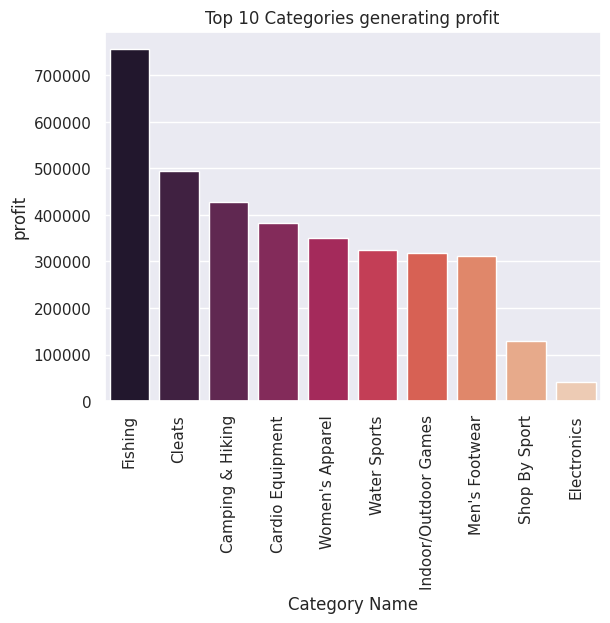

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the top_categories data
top_categories = df.groupby(['Category Name'])['Order Profit Per Order'].sum().sort_values(ascending=False).head(10)

# Create a horizontal bar plot

sns.barplot(x=top_categories.index, y=top_categories.values, palette='rocket')

plt.xlabel('Category Name')
plt.xticks(rotation=90)
plt.ylabel('profit')
plt.title('Top 10 Categories generating profit')
plt.show()


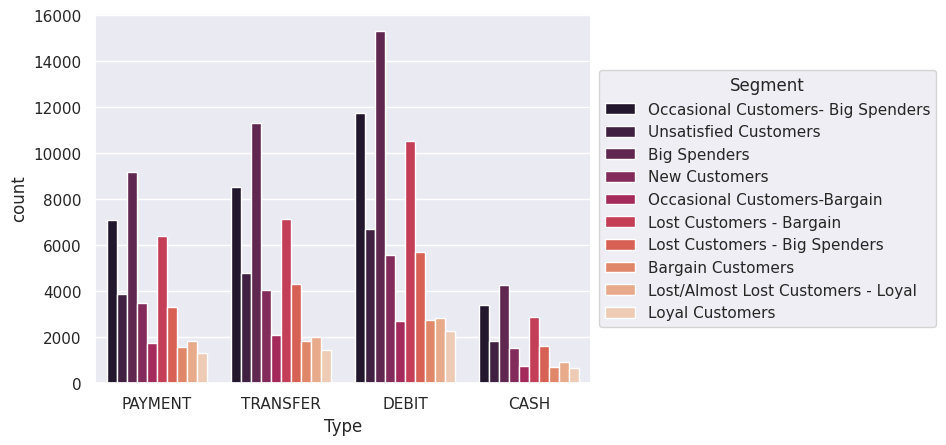

In [ ]:
sns.countplot(x=df['Type'],hue=df['Segment'],palette='rocket')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Segment')

plt.show()



*   The plot reveals that certain customer segments tend to have distinct preferences for specific transaction types.

*   "Big Spenders" and "Occasional Customers - Big Spenders" appear to have a higher frequency of DEBIT and TRANSFER transactions compared to other segments.
*   This information can help the business tailor their product offerings, marketing strategies, and customer service approaches to better cater to the needs and preferences of different customer segments.







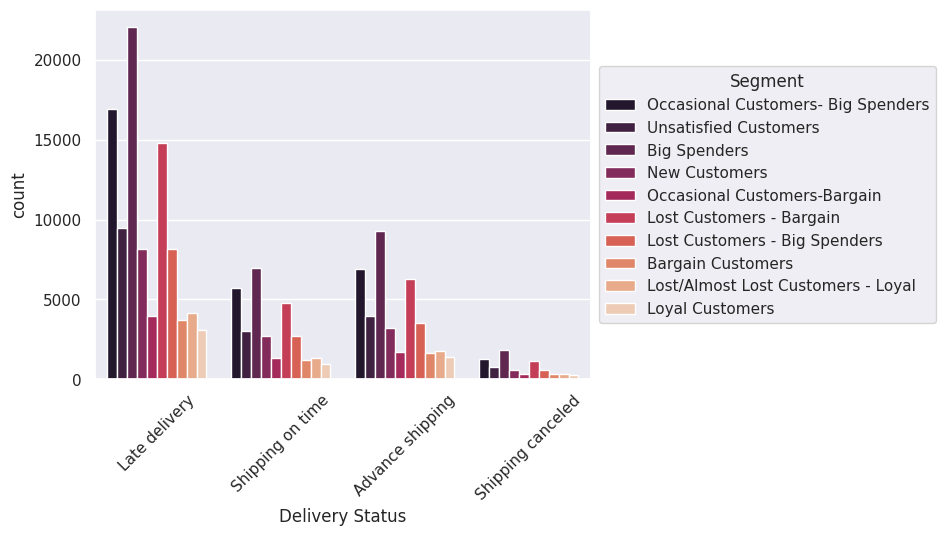

In [ ]:
sns.countplot(x=df['Delivery Status'],hue=df['Segment'],palette='rocket')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Segment')
plt.xticks(rotation=45)
plt.show()




*   The plot highlights areas where the business can focus its efforts to improve delivery performance and customer satisfaction.

*   The high volume of "Late delivery" cases suggests that the business should investigate the root causes and implement strategies to enhance its delivery reliability, such as optimizing logistics, improving supplier relationships, or enhancing communication with customers.
*   This suggests that late deliveries may be negatively impacting the satisfaction and loyalty of these valuable customer segments, which could lead to churn and lost revenue.






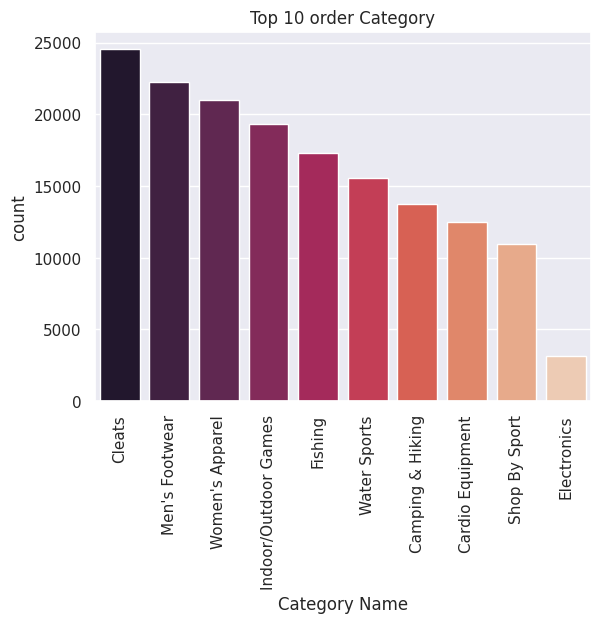

In [ ]:
top_category = df['Category Name'].value_counts().head(10)
top_category_df = pd.DataFrame({'Category Name': top_category.index, 'Count': top_category.values})

sns.barplot(x='Category Name', y='Count', data=top_category_df, palette='rocket')
plt.title('Top 10 order Category')
plt.xticks(rotation=90)
plt.xlabel('Category Name')
plt.ylabel('count')
plt.show()

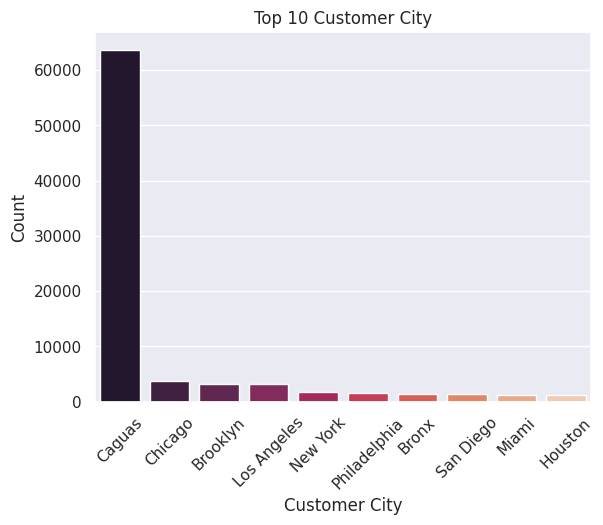

In [ ]:
top_products = df['Customer City'].value_counts().head(10)
top_products_df = pd.DataFrame({'Customer City': top_products.index, 'Count': top_products.values})

sns.barplot(x='Customer City', y='Count', data=top_products_df, palette='rocket')
plt.title('Top 10 Customer City')
plt.xticks(rotation=45)
plt.xlabel('Customer City')
plt.ylabel('Count')
plt.show()

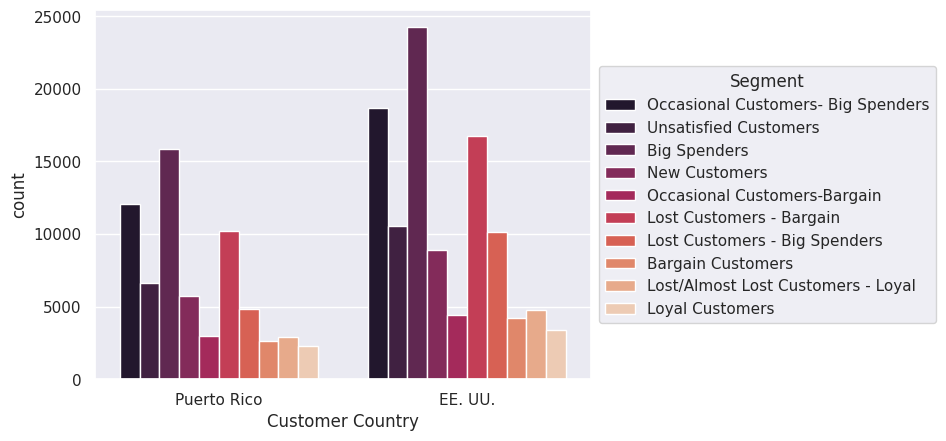

In [ ]:
sns.countplot(x=df['Customer Country'],hue='Segment',data=df,palette='rocket')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Segment')
plt.show()

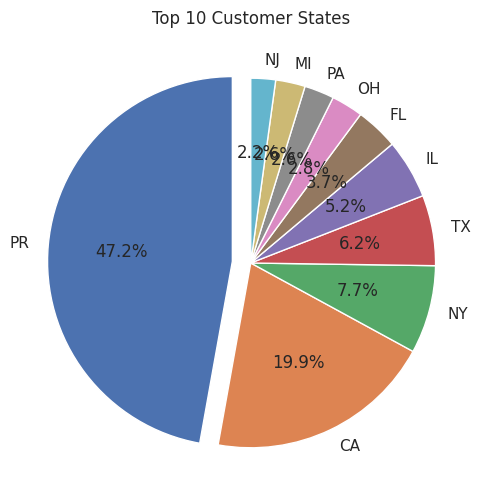

In [ ]:
top_states = df['Customer State'].value_counts().head(10)
top_states_df = pd.DataFrame({'Customer State': top_states.index, 'Count': top_states.values})
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # Explode the first slice (optional)
plt.figure(figsize=(10, 6))
plt.pie(top_states_df['Count'], labels=top_states_df['Customer State'], autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Top 10 Customer States')
plt.show()

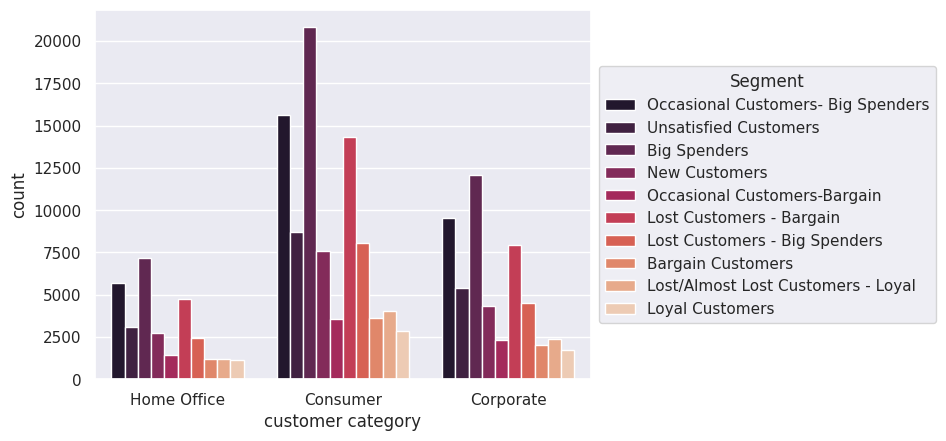

In [ ]:


sns.countplot(x=df['customer category'],hue='Segment',data=df,palette='rocket')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Segment')
plt.show()


<Axes: xlabel='count', ylabel='Department Name'>

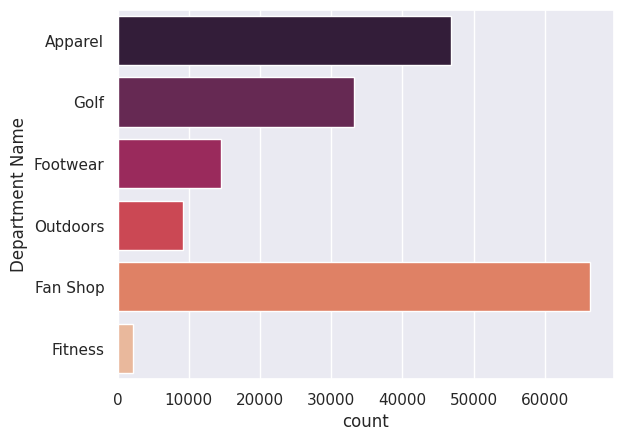

In [ ]:
sns.countplot(df['Department Name'], palette='rocket')

In [ ]:

sns.countplot(x=df['Market'],hue=df['Segment'],palette='rocket')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Segment')
plt.show()


The plot provides valuable insights into the distribution of customer segments across different geographic markets


*   The plot reveals that certain markets, such as LATAM and Europe, have a significantly higher overall count of customers compared to other regions like Africa Market and USCA.
*   Examining the segment breakdown within these high-volume markets can help the business identify the most valuable customer segments to target and prioritize.

*   For example, the "Occasional Customers - Big Spenders" and "Big Spenders" segments appear to have a stronger presence in the LATAM and Europe markets, suggesting these could be high-potential regions to focus on.
*   This information can help the business tailor its strategies, marketing campaigns, and customer service approaches to better cater to the unique needs and preferences of customers in different markets especially in Africa.




<Axes: xlabel='count', ylabel='Order Region'>

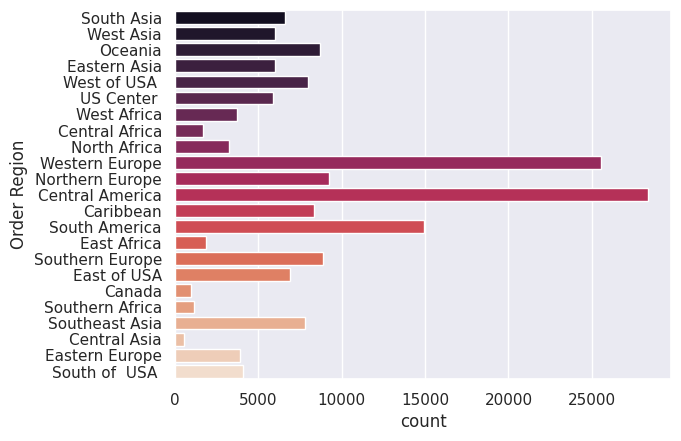

In [ ]:
sns.countplot(df['Order Region'], palette='rocket')

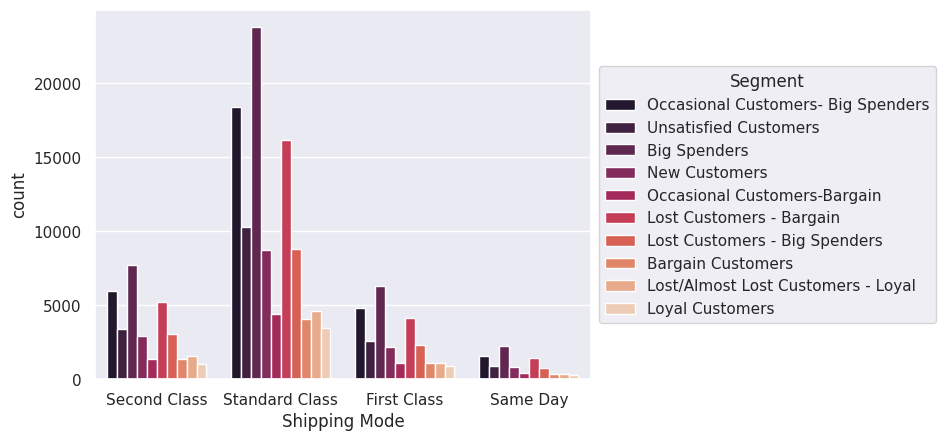

In [ ]:
sns.countplot(x=df['Shipping Mode'],hue=df['Segment'],palette='rocket')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Segment')
plt.show()


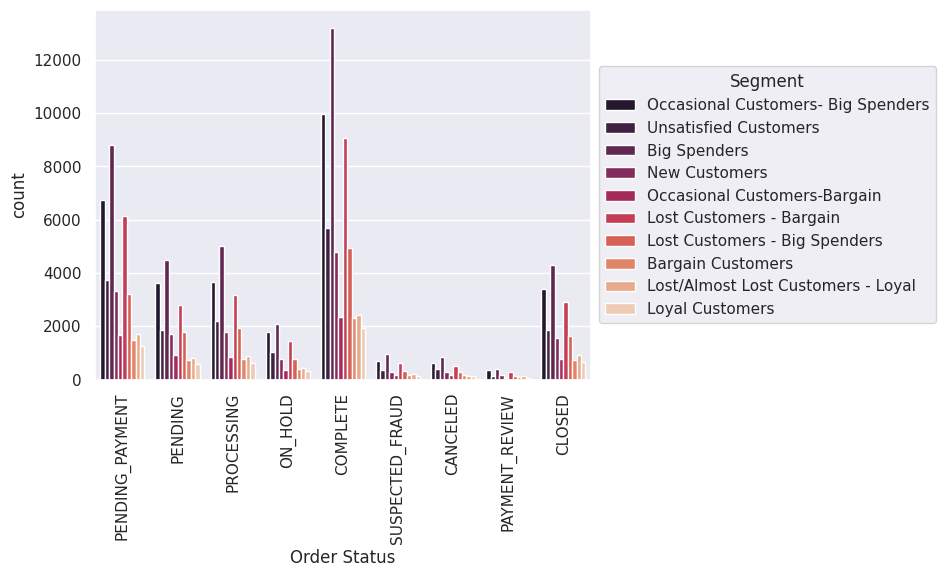

In [ ]:
sns.countplot(x=df['Order Status'],hue=df['Segment'],palette='rocket')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Segment')
plt.xticks(rotation=90)
plt.show()




*   The plot shows the distribution of orders across different order statuses, with some statuses like "Pending Payment" and "Processing" having significantly higher order counts compared to others.

*    The plot highlights the differences in order counts between the various customer segments. For example, "Occasional Customers - Big Spenders" and "Big Spenders" appear to have higher order counts
*   The insights from this plot helps to understand factors influencing order status, such as customer behavior, order characteristics, or supply chain performance. It could also inform targeted strategies to improve order fulfillment and customer satisfaction for different segments.





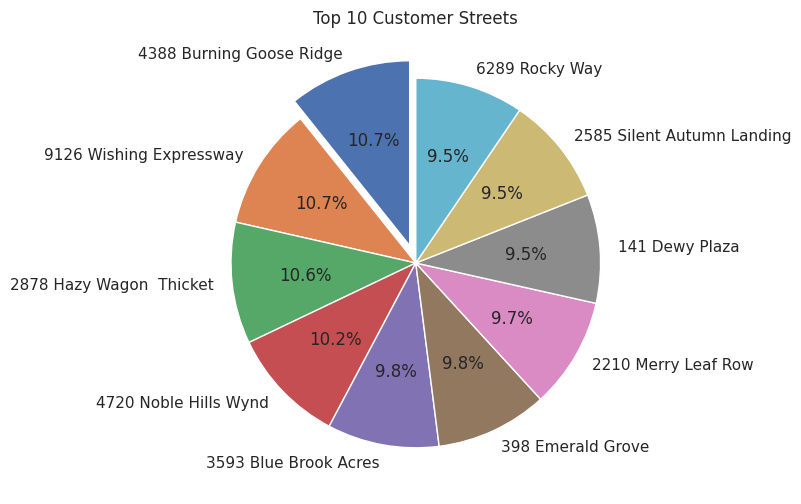

In [ ]:
top_streets = df['Customer Street'].value_counts().head(10)
top_streets_df = pd.DataFrame({'Customer Street': top_streets.index, 'Count': top_streets.values})
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.figure(figsize=(10, 6))
plt.pie(top_streets_df['Count'], labels=top_streets_df['Customer Street'], autopct='%1.1f%%', startangle=90,explode=explode)
plt.title('Top 10 Customer Streets')
plt.show()

In [ ]:
top_countries = df['Order Country'].value_counts().head(10)
top_countries_df = pd.DataFrame({'Order Country': top_countries.index, 'Count': top_countries.values})
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.figure(figsize=(10, 6))
plt.pie(top_countries_df['Count'], labels=top_countries_df['Order Country'], autopct='%1.1f%%', startangle=90, explode=explode,shadow=True)
plt.title('Top 10 Order Countries')

plt.show()

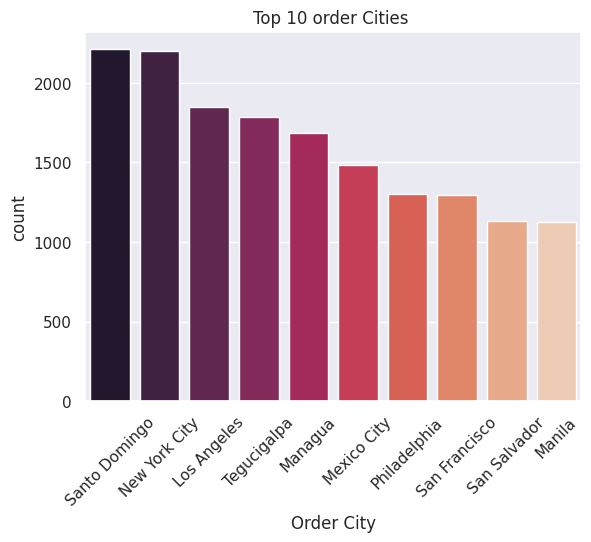

In [ ]:

top_cities = df['Order City'].value_counts().head(10)
top_cities_df = pd.DataFrame({'Order City': top_cities.index, 'Count': top_cities.values})

sns.barplot(x='Order City', y='Count', data=top_cities_df, palette='rocket')
plt.title('Top 10 order Cities ')
plt.xticks(rotation=45)
plt.xlabel('Order City')
plt.ylabel('count')
plt.show()

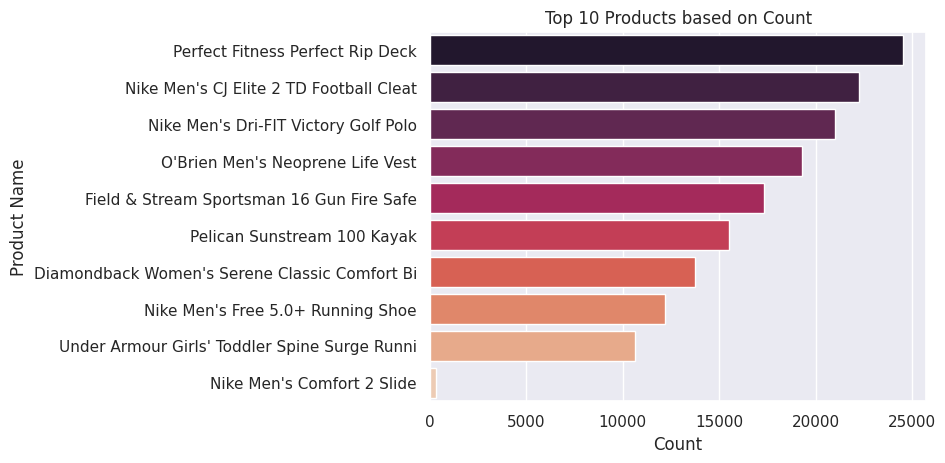

In [ ]:
top_products = df['Product Name'].value_counts().head(10)
top_products_df = pd.DataFrame({'Product Name': top_products.index, 'Count': top_products.values})

sns.barplot(x='Count', y='Product Name', data=top_products_df, palette='rocket')
plt.title('Top 10 Products based on Count')
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.show()

<Axes: ylabel='Product Price'>

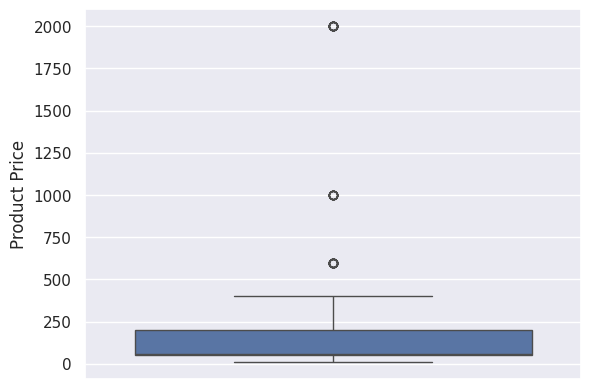

In [ ]:
sns.boxplot(df['Product Price'])

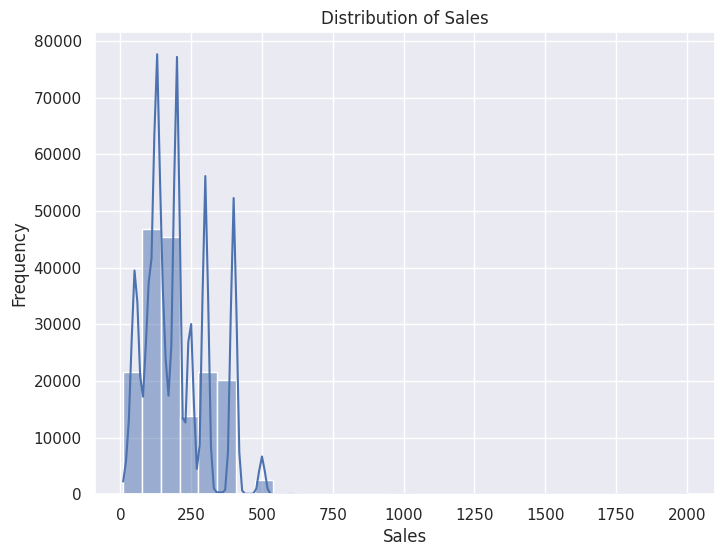

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Sales', bins=30, kde=True) # The KDE curve can be useful for identifying the overall shape and characteristics of the data distribution, such as the location of the peak(s), the skewness, and the presence of multiple modes.
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()



*   The distribution of sales appears to be highly skewed to the right, with a long tail extending towards higher sales values. This suggests that the majority of orders have relatively lower sales, while there are a few orders with significantly higher sales.

*   The histogram exhibits a multi-modal pattern, indicating the presence of multiple distinct peaks or clusters in the sales distribution. This could suggest the existence of different customer segments or product categories with varying sales patterns.
*   The main peaks in the distribution appear to be around the 20,000 and 50,000 sales ranges. These peaks likely represent the most common or frequent sales values in the dataset.


*   The plot shows a few isolated high-sales orders, which can be considered as outliers in the distribution. These outliers may represent exceptional cases or large, high-value orders that are not typical of the overall sales pattern.



## **Detecting & Removing Outliers**

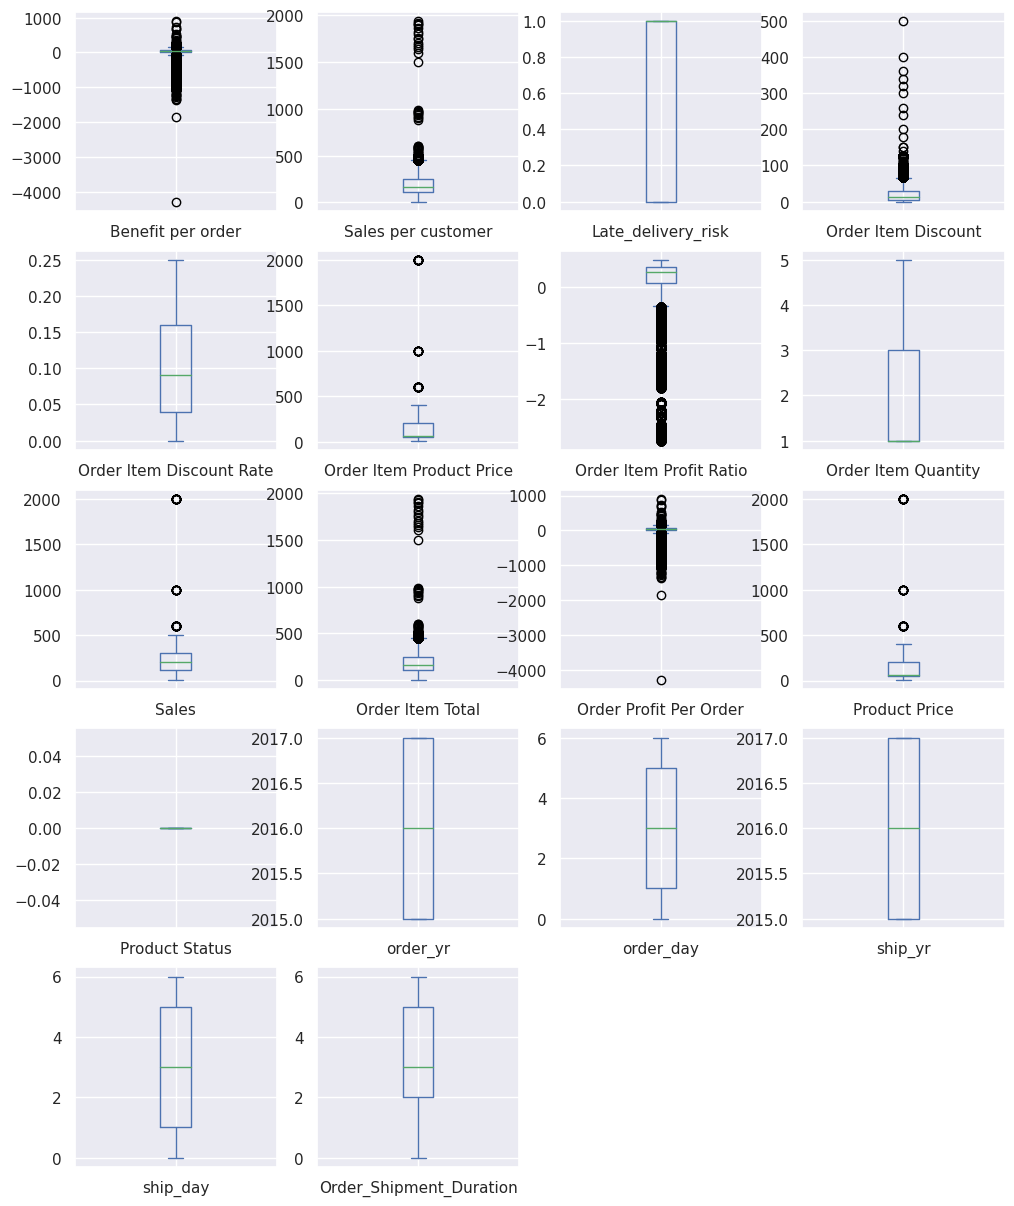

In [ ]:
df.plot(kind='box',figsize=(12,15),layout=(5,4),sharex=False,subplots=True);

In [ ]:

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_outliers_removed = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_outliers_removed

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    df = remove_outliers_iqr(df, column)

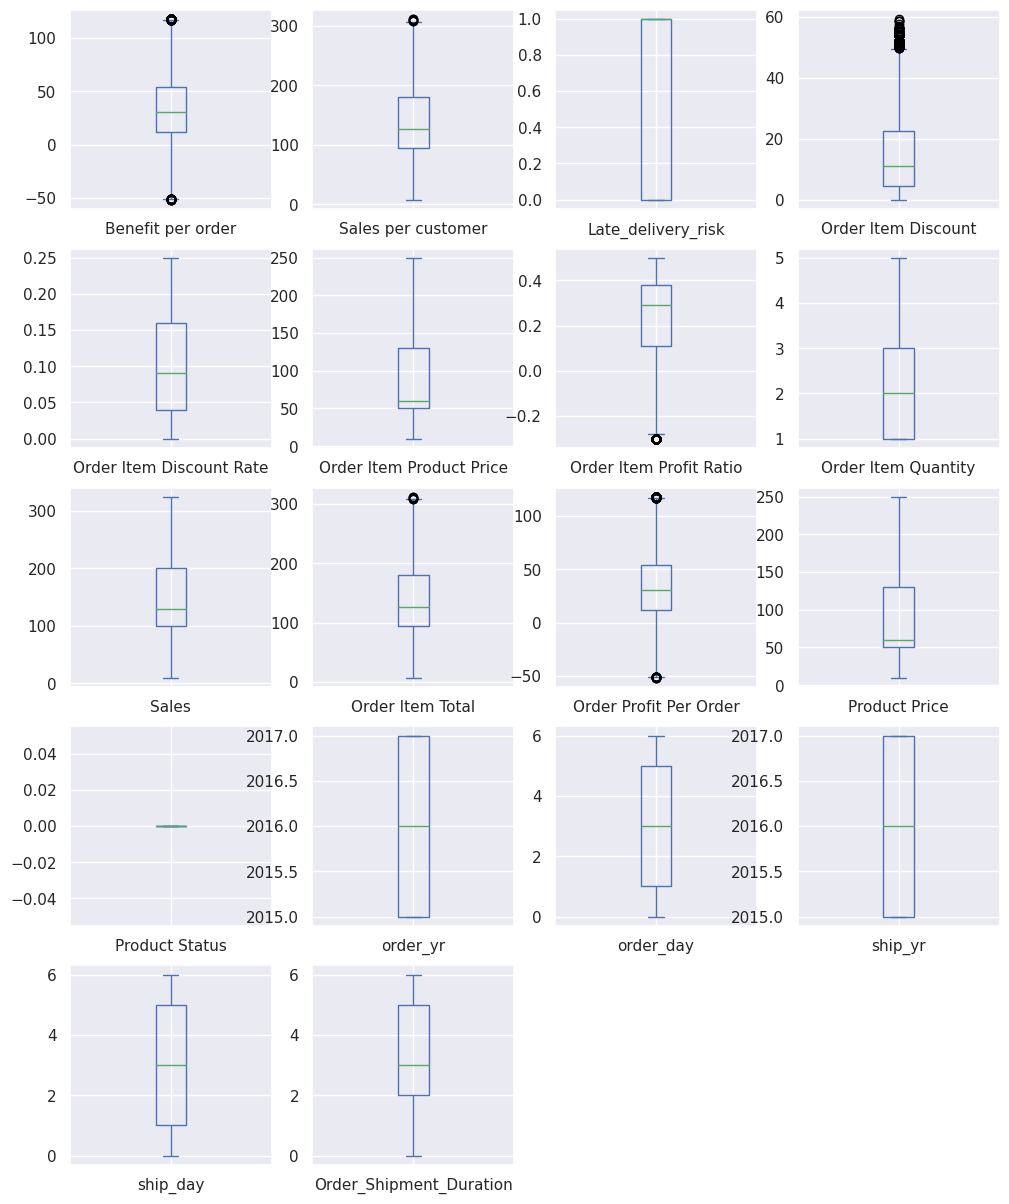

In [ ]:
df.plot(kind='box',figsize=(12,15),layout=(5,4),sharex=False,subplots=True);

## **Exploring Object & Numerical Columns**

In [ ]:
df.select_dtypes(include=['float64','int64']).columns

Index(['Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Product Price', 'Product Status',
       'Order_Shipment_Duration'],
      dtype='object')

In [ ]:
df.select_dtypes(include='object').columns

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'customer category', 'Customer State',
       'Customer Street', 'Department Name', 'Market', 'Order City',
       'Order Country', 'Order Region', 'Order State', 'Order Status',
       'Product Name', 'Shipping Mode', 'order_month', 'ship_month',
       'Segment'],
      dtype='object')

## **Unique Count Of Objects**

In [ ]:
for column in df.select_dtypes(include='object').columns:
    unique_count = len(df[column].unique())
    print(f"{column} : {unique_count}")


Type : 4
Delivery Status : 4
Category Name : 29
Customer City : 562
Customer Country : 2
customer category : 3
Customer State : 44
Customer Street : 6894
Department Name : 6
Market : 5
Order City : 3549
Order Country : 164
Order Region : 23
Order State : 1080
Order Status : 9
Product Name : 85
Shipping Mode : 4
order_month : 12
ship_month : 12
Segment : 10


## **Dropping Features Based On Unique Category Count**

In [ ]:
df.drop(['Customer City','Customer Street','Order City','Order State','Order Country','Product Name'],axis=1,inplace=True)

In [ ]:
for column in df.select_dtypes(include='object').columns:
    unique_count = len(df[column].unique())
    print(f"{column} : {unique_count}")

Type : 4
Delivery Status : 4
Category Name : 29
Customer Country : 2
customer category : 3
Customer State : 44
Department Name : 6
Market : 5
Order Region : 23
Order Status : 9
Shipping Mode : 4
order_month : 12
ship_month : 12
Segment : 10


## **Encoding Categorical Features**

In [ ]:
_df=df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for i in df.select_dtypes(include='object').columns:
  df[i]=lab.fit_transform(df[i])
df



Type  Benefit per order  Sales per customer  Delivery Status  \
0          2         -30.750000          115.180000                1   
2          2          33.599998           96.000000                1   
3          2          24.690001           75.980003                3   
4          2           9.100000           91.000000                1   
5          2         -21.750000           87.000000                1   
...      ...                ...                 ...              ...   
171303     3          48.439999          254.960007                0   
171304     3          41.070000          251.960007                1   
171305     3          92.110001          248.960007                0   
171306     3          76.989998          245.960007                3   
171308     3          37.590000          199.949997                3   

        Late_delivery_risk  Category Name  Customer Country  \
0                        1              5                 1   
2                        1             27                 1   
3                        0             21                 1   
4                        1             27                 1   
5                        1             27                 1   
...                    ...            ...               ...   
171303                   0              5                 1   
171304                   1              5                 1   
171305                   0              5                 1   
171306                   0              5                 1   
171308                   0             21                 1   

        customer category  Customer State  Department Name  Market  \
0                       2              34                0       3   
2                       2              34                4       3   
3                       2              34                4       3   
4                       2              34                4       3   
5                       2              34                4       3   
...                   ...             ...              ...     ...   
171303                  0              34                0       2   
171304                  0              34                0       2   
171305                  0              34                0       2   
171306                  0              34                0       2   
171308                  0              34                4       2   

        Order Item Discount  Order Item Discount Rate  \
0                  4.800000                      0.04   
2                  4.000000                      0.04   
3                  4.000000                      0.05   
4                  9.000000                      0.09   
5                 13.000000                      0.13   
...                     ...                       ...   
171303            44.990002                      0.15   
171304            47.990002                      0.16   
171305            50.990002                      0.17   
171306            53.990002                      0.18   
171308             0.000000                      0.00   

        Order Item Product Price  Order Item Profit Ratio  \
0                      59.990002                    -0.27   
2                      50.000000                     0.35   
3                      39.990002                     0.33   
4                      50.000000                     0.10   
5                      50.000000                    -0.25   
...                          ...                      ...   
171303                 59.990002                     0.19   
171304                 59.990002                     0.16   
171305                 59.990002                     0.37   
171306                 59.990002                     0.31   
171308                 39.990002                     0.19   

        Order Item Quantity       Sales  Order Item Total  \
0                         2  119.980003        115.180000   
2    

In [ ]:
df.columns

Index(['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer Country',
       'customer category', 'Customer State', 'Department Name', 'Market',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order Status',
       'Product Price', 'Product Status', 'Shipping Mode', 'order_yr',
       'order_month', 'order_day', 'ship_yr', 'ship_month', 'ship_day',
       'Order_Shipment_Duration', 'Segment'],
      dtype='object')

In [ ]:
df.shape

(118876, 32)

## **Dimensionality Reduction**

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
df_pca=pca.fit_transform(df)

In [ ]:

df_pca

array([[ -65.66688278,  -15.0596514 ,   80.27893756],
       [ -83.04527257,  -24.62192789,  -15.72659079],
       [-122.09051802,  -27.72565359,  -10.53601388],
       ...,
       [ 213.72384142, -100.4393259 ,  -33.60088535],
       [ 206.43913539,  -97.97150809,  -13.32233743],
       [  79.70445683,  -88.93907451,   16.12650718]])

In [ ]:
new_df=pd.DataFrame(df_pca,columns=['pc1','pc2','pc3'])
new_df

pc1         pc2        pc3
0       -65.666883  -15.059651  80.278938
1       -83.045273  -24.621928 -15.726591
2      -122.090518  -27.725654 -10.536014
3       -94.988424  -20.578852  17.098057
4      -107.714043  -16.215700  58.906693
...            ...         ...        ...
118871  207.444572  -98.006079  27.993501
118872  202.344602  -96.314977  37.561298
118873  213.723841 -100.439326 -33.600885
118874  206.439135  -97.971508 -13.322337
118875   79.704457  -88.939075  16.126507

[118876 rows x 3 columns]

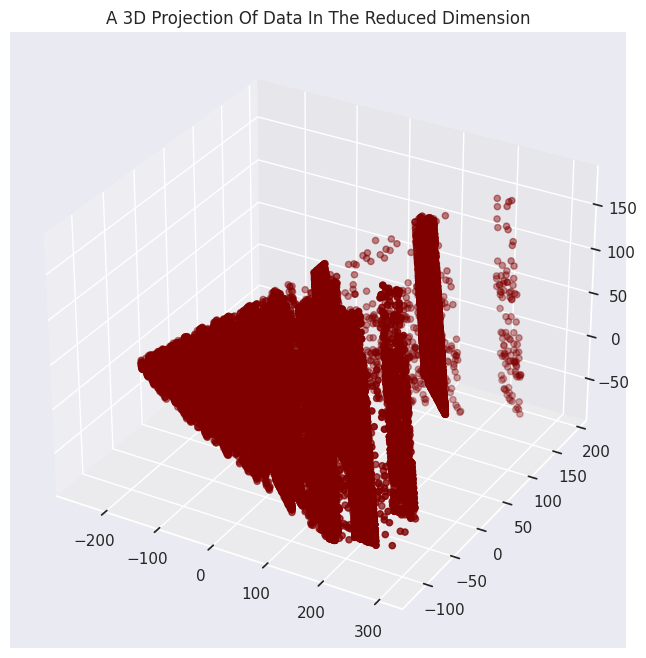

In [ ]:
p =new_df["pc1"]
q =new_df["pc2"]
r =new_df["pc3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(p,q,r, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## **Performing Clustering Analysis**

In [ ]:
from sklearn.cluster import KMeans
lst=[]
for i in range(1,11):
  data=KMeans(n_clusters=i,init='k-means++',random_state=42)       # init - for initilaisation of k means
  data.fit(new_df)
  lst.append(data.inertia_)

In [ ]:
print(lst)

[2353895627.335776, 1262212764.300746, 780648656.4008613, 546113410.894306, 389681905.70679414, 303809216.2123777, 263710763.27704853, 234490999.3051908, 209765313.37395942, 186132774.35651213]


Text(0.5, 1.0, 'Elbow point evaluation')

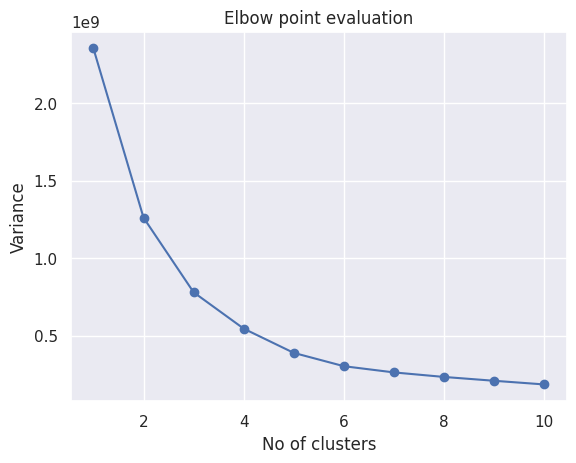

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),lst,marker='o')
plt.xlabel('No of clusters')
plt.ylabel('Variance')
plt.title('Elbow point evaluation')



## **Validation of Clustering Algorithm Using Silhouette Scoring**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [ ]:
range_n_clusters = [5,6,7]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.4620278216777577
For n_clusters = 6 The average silhouette_score is : 0.4312292584991648
For n_clusters = 7 The average silhouette_score is : 0.43120936910088636


In [ ]:
model=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_means=model.fit_predict(new_df)
y_means

array([0, 0, 0, ..., 3, 3, 1], dtype=int32)

## **Distribution Of Clusters**

In [ ]:
new_df['cluster'] = y_means
df['cluster']=y_means
_df['cluster']=y_means

In [ ]:
new_df.head()

pc1        pc2        pc3  cluster
0  -65.666883 -15.059651  80.278938        0
1  -83.045273 -24.621928 -15.726591        0
2 -122.090518 -27.725654 -10.536014        0
3  -94.988424 -20.578852  17.098057        0
4 -107.714043 -16.215700  58.906693        0

In [ ]:
new_df['cluster'].value_counts()

cluster
cluster 0    35393
cluster 1    29469
cluster 2    22900
cluster 3    16665
Name: count, dtype: int64

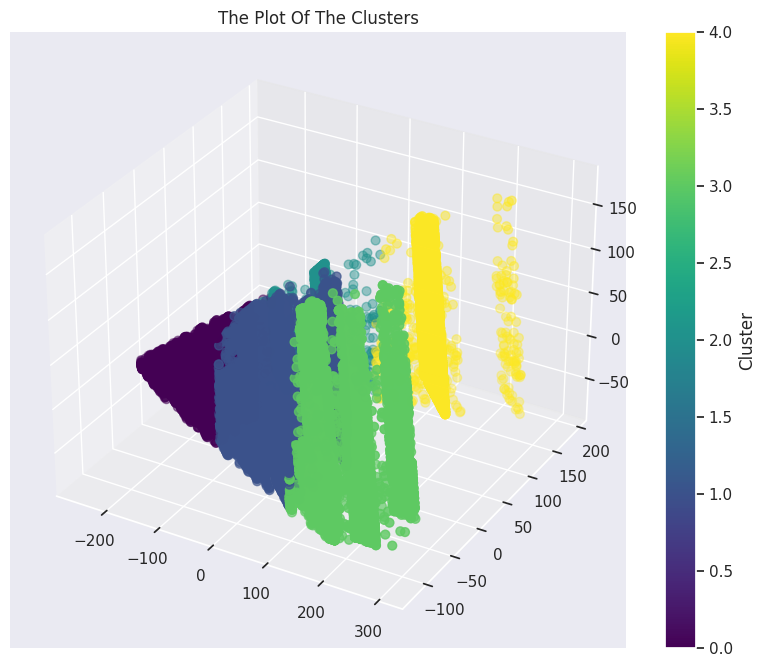

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a colormap
cmap = plt.cm.get_cmap('viridis')

# Plotting the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(new_df['pc1'], new_df['pc2'], new_df['pc3'], s=40, c=new_df['cluster'], marker='o', cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()


In [ ]:
# cluster_mapping={0:'cluster 0',
#                  1:'cluster 1',
#                  2:'cluster 2',
#                  3:'cluster 3'}

# new_df['cluster']=new_df['cluster'].map(cluster_mapping)
# df['cluster']=df['cluster'].map(cluster_mapping)
# _df['cluster']=_df['cluster'].map(cluster_mapping)

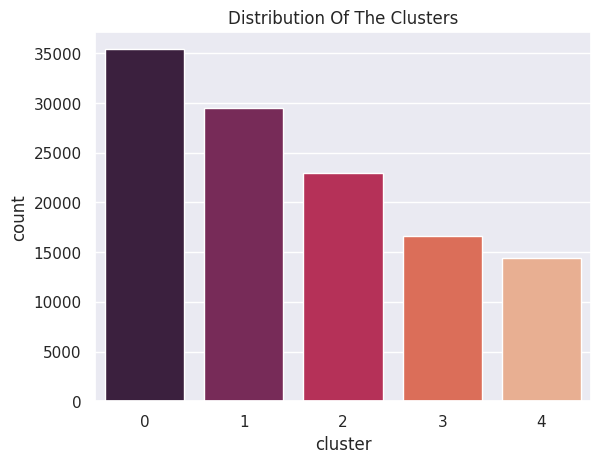

In [ ]:

pl = sns.countplot(x=new_df["cluster"], palette= 'rocket')
pl.set_title("Distribution Of The Clusters")
plt.show()

## **Clustering Analysis: Understanding Grouping Properties**

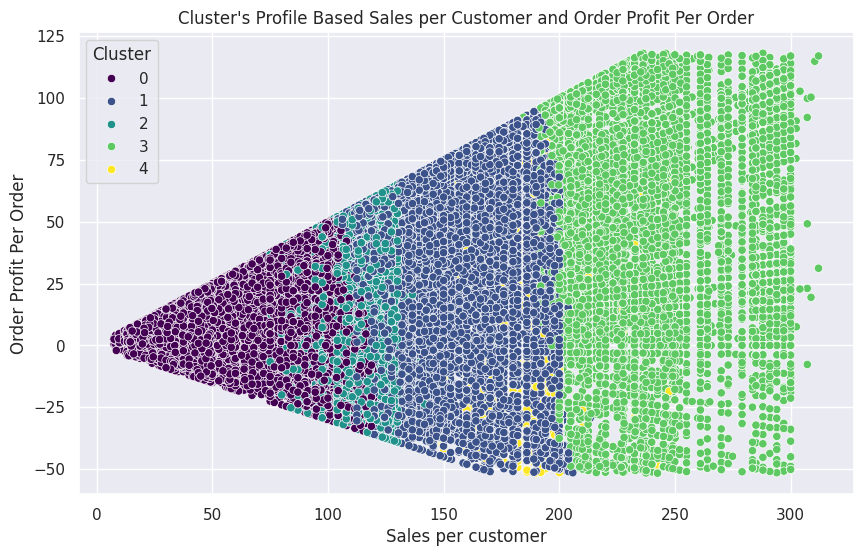

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the scatter plot with cluster labels
plt.figure(figsize=(10, 6))
pl = sns.scatterplot(data=df, x=df["Sales per customer"], y=df["Order Profit Per Order"], hue=df["cluster"], palette='viridis')
pl.set_title("Cluster's Profile Based Sales per Customer and Order Profit Per Order")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


The scatterplot provides several valuable insights into the relationship between sales per customer and order profit per order across different customer clusters:



*    The distinct clustering of data points in different colors clearly shows that the customers can be divided into well-defined groups or segments based on their sales and profit per order characteristics
*   The scatterplot exhibits a triangular shape with the clusters arranged in a diagonal line from the bottom left (low sales, low profit) to the top right (high sales, high profit). This suggests a positive correlation between sales per customer and order profit per order.

*   The insights can help the business identify the most valuable customer segments (e.g., Cluster 3) and understand the drivers of their high sales and profitability.
*   The analysis can also reveal potential areas for optimization, such as improving the profitability of the high-sales but lower-profit Cluster 4 customers





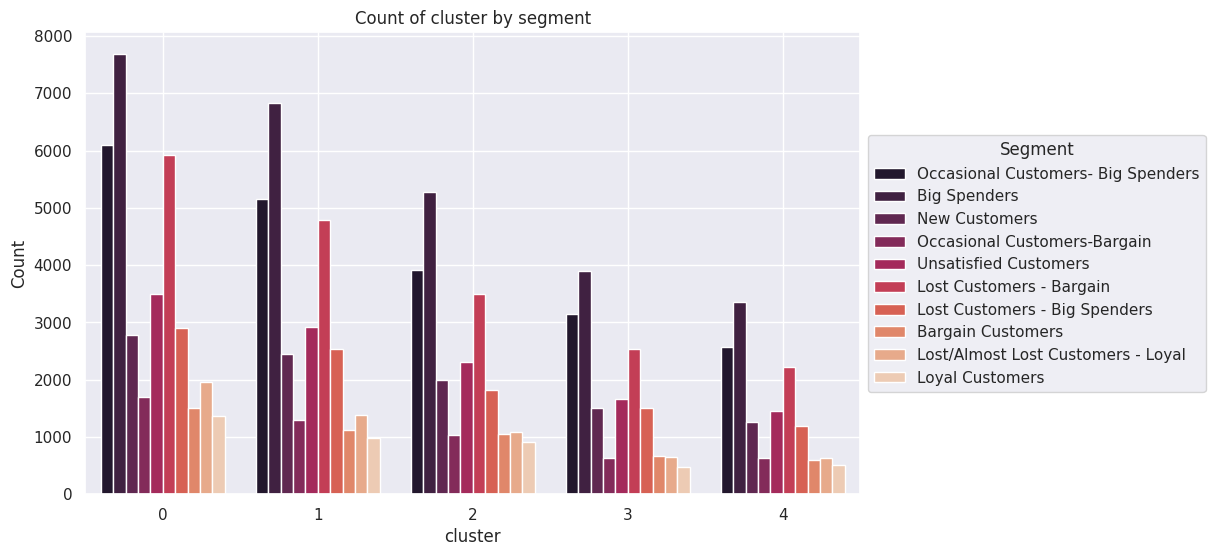

In [ ]:
import seaborn as sns

# Plotting the countplot with cluster labels
plt.figure(figsize=(10, 6))
sns.countplot(data=_df, x='cluster', hue='Segment',palette='rocket')
plt.title("Count of cluster by segment")
plt.xlabel("cluster")
plt.ylabel("Count")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Segment')
plt.grid(True)
plt.show()


The insights from this plot can help the business understand the characteristics and distribution of different customer segments across the clusters.

*   The "Occasional Customers - Big Spenders" and "Lost Customers - Big Spenders" are the most prevalent segments, with a significant presence in Cluster 0.
*   "Big Spenders" are well-represented across multiple clusters, indicating their importance to the business.

*   The cluster compositions can guide the business in developing tailored marketing, sales, and customer service approaches for each identified segment.






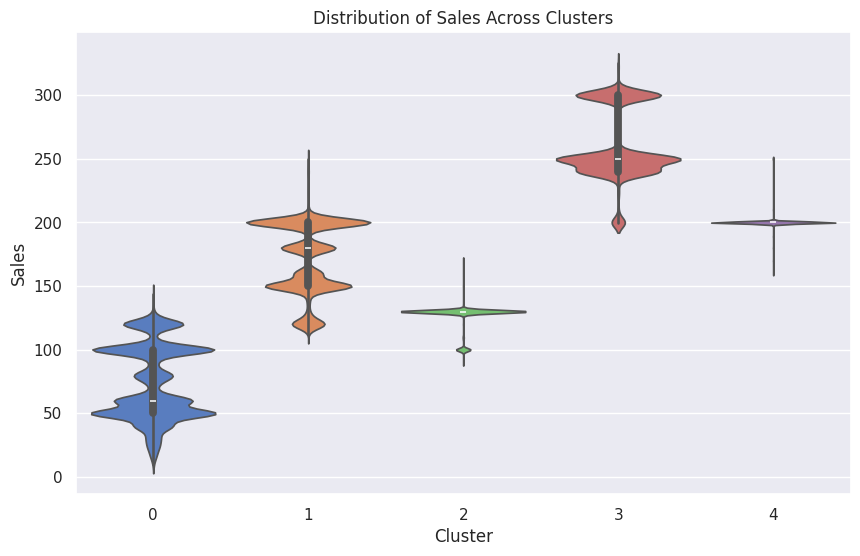

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=_df, x='cluster', y='Sales', palette='muted')
plt.title('Distribution of Sales Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Sales')
plt.show()



This Plot suggests that supply chain has a diverse set of sales patterns across different clusters

*   The size and shape of the violin plots indicate the level of variation in sales within each cluster. Clusters 2 and 4 have the widest distributions, implying a higher degree of variability in sales compared to the other clusters.
*   The most of the sales occurs in cluster 3 while low sales occurs in cluster 0



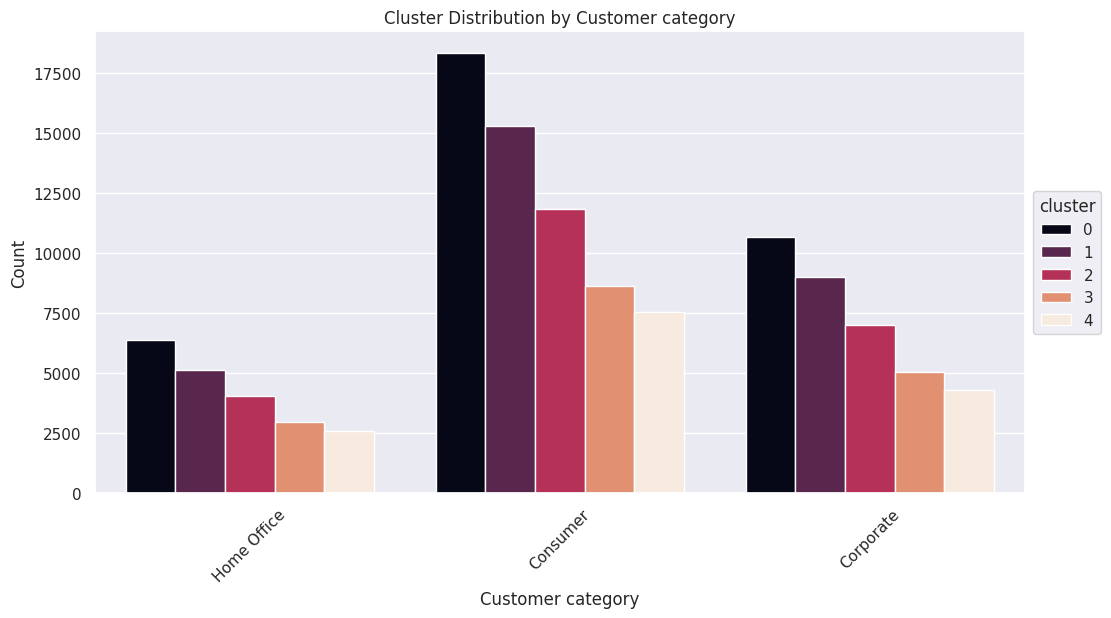

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=_df, x='customer category', hue='cluster', palette='rocket')
plt.title('Cluster Distribution by Customer category')
plt.xlabel('Customer category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='cluster')
plt.show()


In [ ]:
df.select_dtypes(include=['float64','int64']).columns

Index(['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer Country',
       'customer category', 'Customer State', 'Department Name', 'Market',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order Status',
       'Product Price', 'Product Status', 'Shipping Mode', 'order_month',
       'ship_month', 'Order_Shipment_Duration', 'Segment'],
      dtype='object')

In [ ]:
df.dtypes

Type                          int64
Benefit per order           float64
Sales per customer          float64
Delivery Status               int64
Late_delivery_risk            int64
Category Name                 int64
Customer Country              int64
customer category             int64
Customer State                int64
Department Name               int64
Market                        int64
Order Item Discount         float64
Order Item Discount Rate    float64
Order Item Product Price    float64
Order Item Profit Ratio     float64
Order Item Quantity           int64
Sales                       float64
Order Item Total            float64
Order Profit Per Order      float64
Order Region                  int64
Order Status                  int64
Product Price               float64
Product Status                int64
Shipping Mode                 int64
order_yr                      int32
order_month                   int64
order_day                     int32
ship_yr                     

In [ ]:
df.drop(['Product Status','Order_Shipment_Duration'],axis=1,inplace=True)

In [ ]:
df.shape

(118876, 31)

## **Correlation Of Features**

In [ ]:
df.corr()

Type  Benefit per order  Sales per customer  \
Type                      1.000000           0.003234            0.003743   
Benefit per order         0.003234           1.000000            0.481577   
Sales per customer        0.003743           0.481577            1.000000   
Delivery Status           0.045558           0.004003            0.003271   
Late_delivery_risk       -0.063161          -0.003301           -0.004723   
Category Name            -0.003813           0.013346            0.001811   
Customer Country          0.005205          -0.001777           -0.000017   
customer category        -0.001138          -0.003760           -0.003128   
Customer State            0.002746          -0.003969            0.001477   
Department Name           0.000336          -0.088412           -0.179235   
Market                   -0.001204          -0.007821           -0.015943   
Order Item Discount       0.004247           0.163083            0.327384   
Order Item Discount Rate  0.001191          -0.091148           -0.192470   
Order Item Product Price  0.001036           0.131052            0.258885   
Order Item Profit Ratio   0.001923           0.793989           -0.011756   
Order Item Quantity       0.003304           0.277729            0.575522   
Sales                     0.004255           0.474848            0.983898   
Order Item Total          0.003743           0.481577            1.000000   
Order Profit Per Order    0.003234           1.000000            0.481577   
Order Region             -0.003120           0.001367            0.001782   
Order Status              0.805358           0.001572            0.002388   
Product Price             0.001036           0.131052            0.258885   
Shipping Mode            -0.000199           0.000514            0.001240   
order_yr                  0.006971           0.012056            0.029322   
order_month               0.001533           0.003819            0.000338   
order_day                 0.003321           0.000655           -0.002711   
ship_yr                   0.007587           0.011741            0.029262   
ship_month               -0.001887           0.003887            0.001498   
ship_day                 -0.006531          -0.000479           -0.002590   
Segment                   0.001386          -0.000968           -0.000831   
cluster                   0.002087           0.380462            0.731170   

                          Delivery Status  Late_delivery_risk  Category Name  \
Type                             0.045558           -0.063161      -0.003813   
Benefit per order                0.004003           -0.003301       0.013346   
Sales per customer               0.003271           -0.004723       0.001811   
Delivery Status                  1.000000           -0.190824       0.001012   
Late_delivery_risk              -0.190824            1.000000      -0.002857   
Category Name                    0.001012           -0.002857       1.000000   
Customer Country                -0.002791           -0.001697      -0.000676   
customer category               -0.001681            0.000779       0.000220   
Customer State                   0.002489           -0.003606       0.002692   
Department Name                 -0.009476            0.002982       0.254984   
Market                           0.004478            0.001757      -0.011742   
Order Item Discount              0.001403           -0.001957       0.021217   
Order Item Discount Rate        -0.000679           -0.001042       0.011168   
Order Item Product Price         0.005521           -0.003025       0.335255   
Order Item Profit Ratio          0.003681           -0.000441       0.006322   
Order Item Quantity             -0.003453            0.000552      -0.165879   
Sales                            0.003281           -0.004725       0.005684   
Order Item Total                 0.003271           -0.004723       0.001811   
Order Profit Per Order           0.004003    

<Axes: >

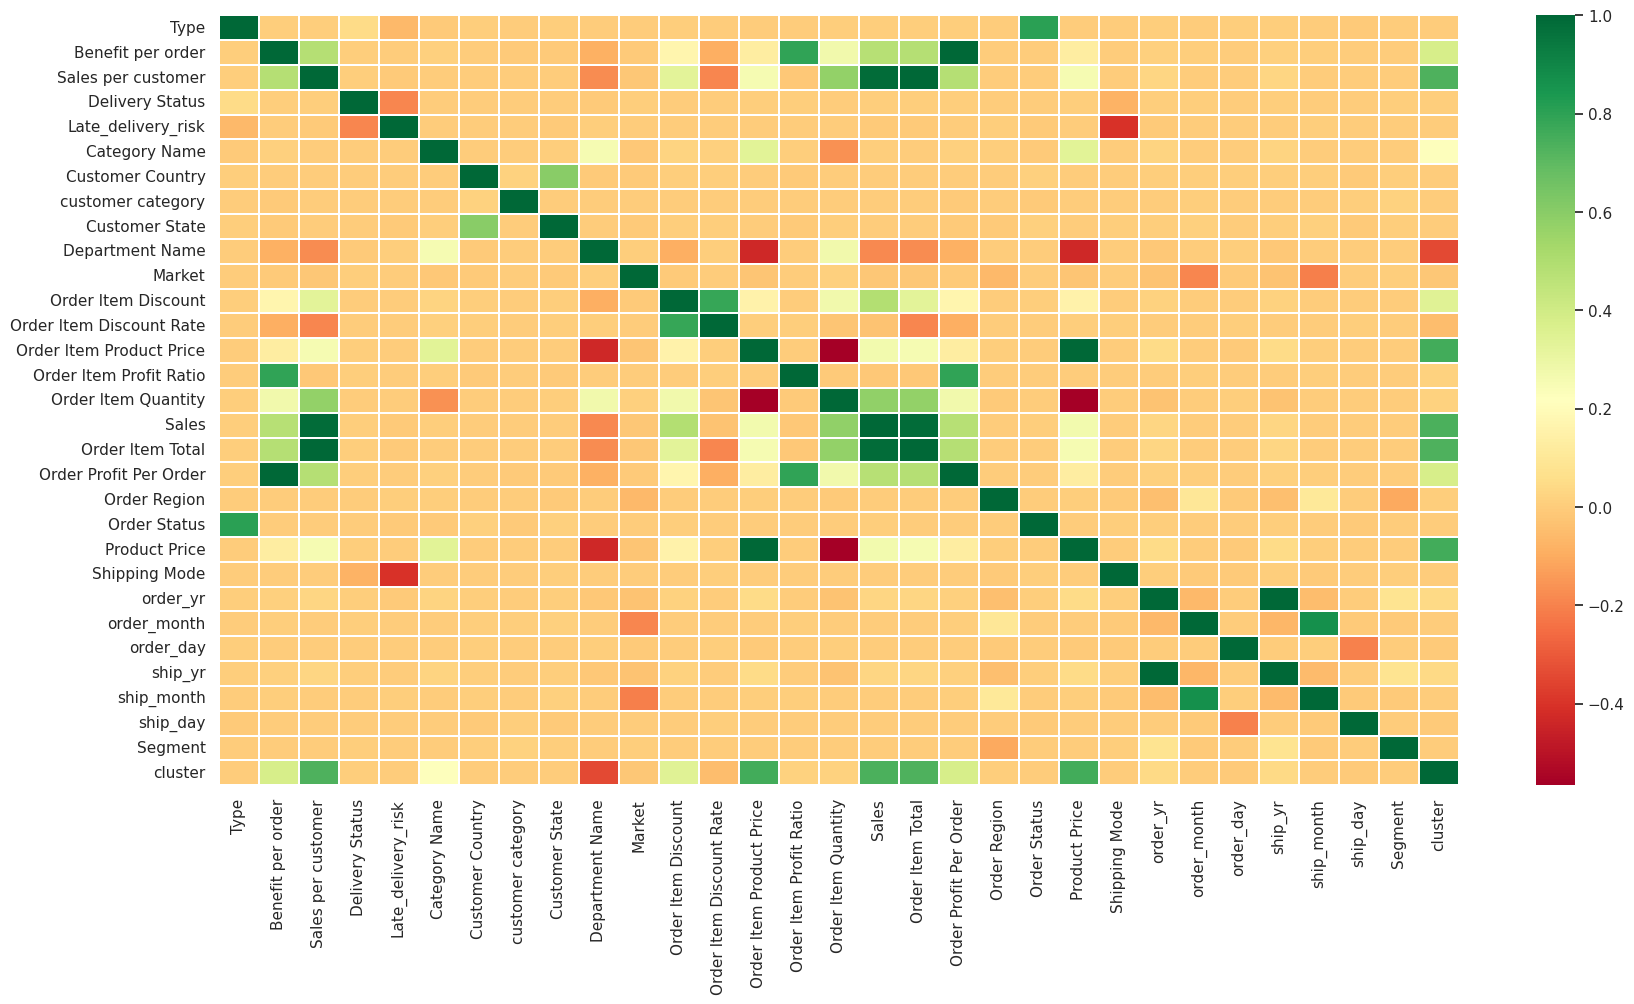

In [ ]:
fig=plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),fmt=".3f",cmap="RdYlGn",linewidth=.3)

In [ ]:
df.columns

Index(['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer Country',
       'customer category', 'Customer State', 'Department Name', 'Market',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order Status',
       'Product Price', 'Shipping Mode', 'order_yr', 'order_month',
       'order_day', 'ship_yr', 'ship_month', 'ship_day', 'Segment', 'cluster'],
      dtype='object')

## **Correlation Of Components**

In [ ]:
new_df.corr()

pc1           pc2           pc3   cluster
pc1      1.000000e+00 -8.394750e-16 -2.080776e-17  0.832884
pc2     -8.394750e-16  1.000000e+00  1.695747e-17  0.435671
pc3     -2.080776e-17  1.695747e-17  1.000000e+00  0.012041
cluster  8.328842e-01  4.356714e-01  1.204105e-02  1.000000

<Axes: >

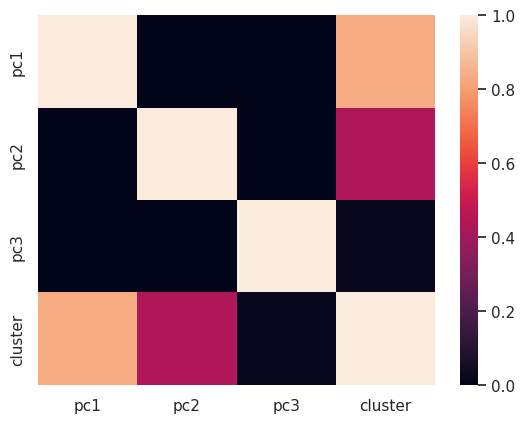

In [ ]:
sns.heatmap(new_df.corr())

## **Seperating Input & Output Features**

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

## **Dividing Data into Training and Testing Set**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

## **Scaling The Features**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()            # object creation
scaler.fit(x_train)                # fit x_train only becz we only collect the mean and sd of input training data only becz this model works based on that
x_train=scaler.transform(x_train)  # here new x_train is the transformed data ie, normalised data
x_test=scaler.transform(x_test)

# **Model Creation For Cluster Classification**

## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([1, 1, 4, ..., 3, 0, 2], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
score1=accuracy_score(y_test,y_pred)
score1

0.9408911196478142

**K-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score


knn_model = KNeighborsClassifier()
num_folds = 3
scores = cross_val_score(knn_model, x_train, y_train, cv=num_folds, scoring='accuracy')

print(f"accuracy for {num_folds}-fold Cross-Validation:")
print(scores)
mean_score = scores.mean()
print(f'Mean Cross-Validation Score (accuracy): {mean_score}')


accuracy for 3-fold Cross-Validation:
[0.93629678 0.93745043 0.93755633]
Mean Cross-Validation Score (accuracy): 0.9371011795651296


In [ ]:
mat=confusion_matrix(y_test,y_pred)
mat

array([[10153,   387,    19,     0,     0],
       [  696,  7914,     9,   189,     0],
       [  132,     7,  6749,     0,     1],
       [    0,   655,     0,  4328,     0],
       [    0,     0,    13,     0,  4411]])

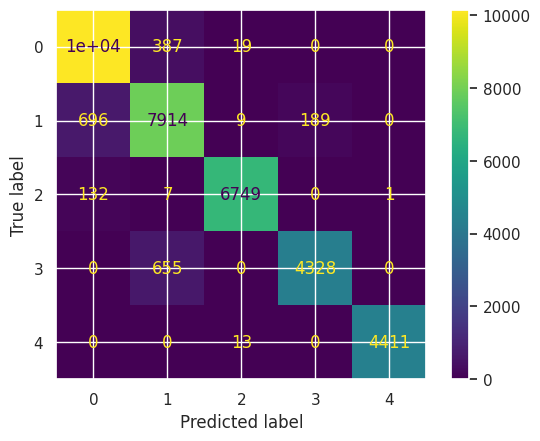

In [ ]:
labels=[0,1,2,3,4]
dis=ConfusionMatrixDisplay(mat,display_labels=labels)
dis.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10559
           1       0.88      0.90      0.89      8808
           2       0.99      0.98      0.99      6889
           3       0.96      0.87      0.91      4983
           4       1.00      1.00      1.00      4424

    accuracy                           0.94     35663
   macro avg       0.95      0.94      0.95     35663
weighted avg       0.94      0.94      0.94     35663



**Hyper Paramter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],

}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform the grid search
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_knn = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_knn.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'n_neighbors': 9, 'weights': 'distance'}
Best Score: 0.9489142304034489
Test Accuracy: 0.9539578835207357


**KNN After Tuning**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors= 9, weights = 'distance')
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred


array([1, 3, 4, ..., 3, 0, 0], dtype=int32)

In [ ]:
knn

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
knn_score=accuracy_score(y_test,y_pred)
knn_score

0.9539578835207357

In [ ]:
mat=confusion_matrix(y_test,y_pred)
mat

array([[10214,   326,    19,     0,     0],
       [  542,  8147,    16,   103,     0],
       [  141,     4,  6743,     0,     1],
       [    0,   627,     0,  4356,     0],
       [    0,     0,    10,     0,  4414]])

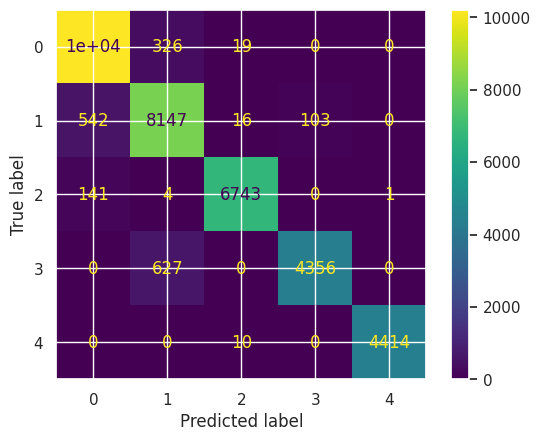

In [ ]:
labels=[0,1,2,3,4]
dis=ConfusionMatrixDisplay(mat,display_labels=labels)
dis.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10559
           1       0.89      0.92      0.91      8808
           2       0.99      0.98      0.99      6889
           3       0.98      0.87      0.92      4983
           4       1.00      1.00      1.00      4424

    accuracy                           0.95     35663
   macro avg       0.96      0.95      0.95     35663
weighted avg       0.95      0.95      0.95     35663



## **Naive bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gos=GaussianNB()
gos.fit(x_train,y_train)
y_pred=gos.predict(x_test)
naive_score=accuracy_score(y_test,y_pred)
naive_score

0.9778762302666629

In [ ]:
gos

GaussianNB()

**K-Fold Kross Validation**

In [ ]:
gos_model = GaussianNB()
num_folds = 3
scores = cross_val_score(gos_model, x_train, y_train, cv=num_folds, scoring='accuracy')

print(f"accuracy for {num_folds}-fold Cross-Validation:")
print(scores)
mean_score = scores.mean()
print(f'Mean Cross-Validation Score (accuracy): {mean_score}')


accuracy for 3-fold Cross-Validation:
[0.97854928 0.97721537 0.97995457]
Mean Cross-Validation Score (accuracy): 0.9785730760998548


In [ ]:
mat=confusion_matrix(y_test,y_pred)
mat

array([[10266,   291,     2,     0,     0],
       [  285,  8491,     0,    32,     0],
       [   10,     0,  6879,     0,     0],
       [    0,   145,     0,  4838,     0],
       [    0,     0,    21,     3,  4400]])

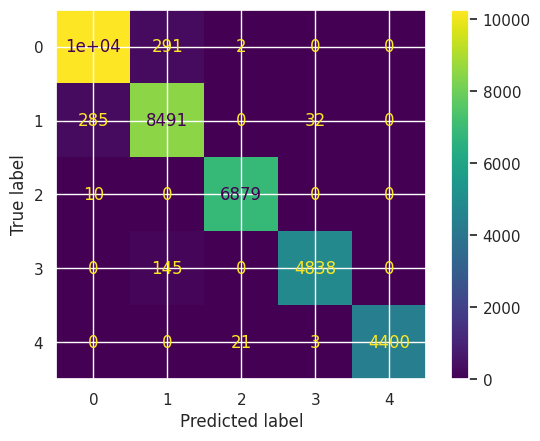

In [ ]:
labels=[0,1,2,3,4]
dis=ConfusionMatrixDisplay(mat,display_labels=labels)
dis.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     10559
           1       0.95      0.96      0.96      8808
           2       1.00      1.00      1.00      6889
           3       0.99      0.97      0.98      4983
           4       1.00      0.99      1.00      4424

    accuracy                           0.98     35663
   macro avg       0.98      0.98      0.98     35663
weighted avg       0.98      0.98      0.98     35663



## **SVM**

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
svm_score=accuracy_score(y_test,y_pred)
svm_score

0.9929058127471049

In [ ]:
svc

SVC()

In [ ]:
svc_model = SVC()
num_folds = 3
scores = cross_val_score(svc_model, x_train, y_train, cv=num_folds, scoring='accuracy')

print(f"accuracy for {num_folds}-fold Cross-Validation:")
print(scores)
mean_score = scores.mean()
print(f'Mean Cross-Validation Score (accuracy): {mean_score}')

accuracy for 3-fold Cross-Validation:
[0.99127551 0.99174418 0.99271731]
Mean Cross-Validation Score (accuracy): 0.9919123310657944


In [ ]:
mat=confusion_matrix(y_test,y_pred)
mat

array([[10513,    38,     8,     0,     0],
       [   95,  8675,     0,    38,     0],
       [    0,     0,  6887,     0,     2],
       [    0,    69,     0,  4914,     0],
       [    0,     0,     3,     0,  4421]])

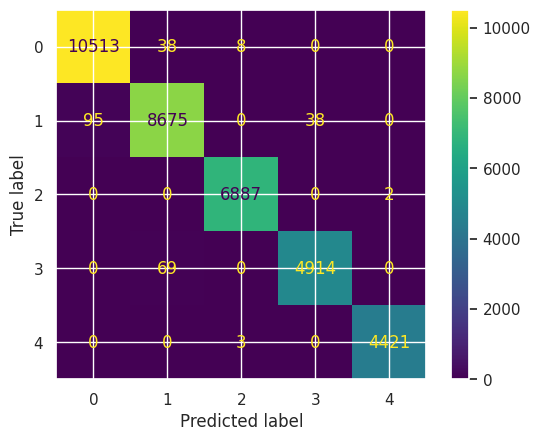

In [ ]:
labels=[0,1,2,3,4]
dis=ConfusionMatrixDisplay(mat,display_labels=labels)
dis.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10559
           1       0.99      0.98      0.99      8808
           2       1.00      1.00      1.00      6889
           3       0.99      0.99      0.99      4983
           4       1.00      1.00      1.00      4424

    accuracy                           0.99     35663
   macro avg       0.99      0.99      0.99     35663
weighted avg       0.99      0.99      0.99     35663



## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
tree_score=accuracy_score(y_test,y_pred)
tree_score

0.9982615035190534

In [ ]:
tree

DecisionTreeClassifier()

In [ ]:
tree_model = DecisionTreeClassifier()
num_folds = 3
scores = cross_val_score(tree_model, x_train, y_train, cv=num_folds, scoring='accuracy')

print(f"accuracy for {num_folds}-fold Cross-Validation:")
print(scores)
mean_score = scores.mean()
print(f'Mean Cross-Validation Score (accuracy): {mean_score}')

accuracy for 3-fold Cross-Validation:
[0.99740428 0.99718797 0.99862999]
Mean Cross-Validation Score (accuracy): 0.9977407483114479


In [ ]:
mat=confusion_matrix(y_test,y_pred)
mat

array([[10538,    20,     1,     0,     0],
       [   19,  8778,     0,    11,     0],
       [    0,     0,  6889,     0,     0],
       [    0,     9,     0,  4974,     0],
       [    0,     0,     2,     0,  4422]])

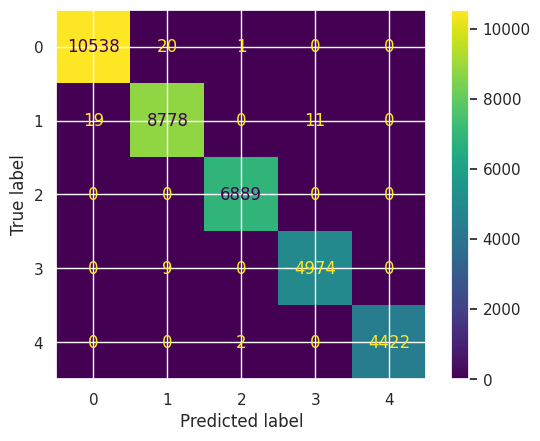

In [ ]:
labels=[0,1,2,3,4]
dis=ConfusionMatrixDisplay(mat,display_labels=labels)
dis.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10559
           1       1.00      1.00      1.00      8808
           2       1.00      1.00      1.00      6889
           3       1.00      1.00      1.00      4983
           4       1.00      1.00      1.00      4424

    accuracy                           1.00     35663
   macro avg       1.00      1.00      1.00     35663
weighted avg       1.00      1.00      1.00     35663



## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
forest.fit(x_train,y_train)
y_pred=forest.predict(x_test)
forest_score=accuracy_score(y_test,y_pred)
forest_score

0.9989344698987747

In [ ]:
forest

RandomForestClassifier()

In [ ]:
forest_model = RandomForestClassifier()
num_folds = 3
scores = cross_val_score(forest_model, x_train, y_train, cv=num_folds, scoring='accuracy')

print(f"accuracy for {num_folds}-fold Cross-Validation:")
print(scores)
mean_score = scores.mean()
print(f'Mean Cross-Validation Score (accuracy): {mean_score}')

accuracy for 3-fold Cross-Validation:
[0.99780085 0.99859399 0.99888236]
Mean Cross-Validation Score (accuracy): 0.9984257322368748


In [ ]:
mat=confusion_matrix(y_test,y_pred)
mat

array([[10539,    19,     1,     0,     0],
       [    5,  8795,     0,     8,     0],
       [    0,     0,  6889,     0,     0],
       [    0,     5,     0,  4978,     0],
       [    0,     0,     0,     0,  4424]])

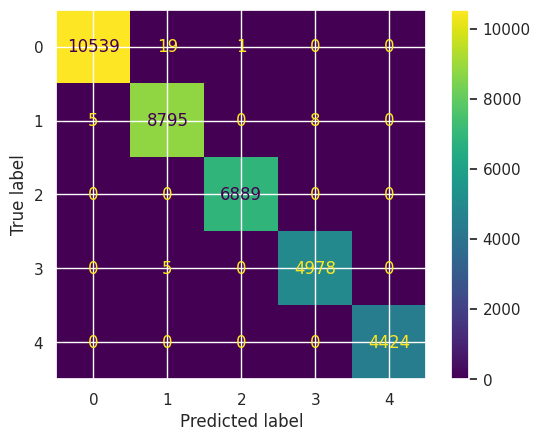

In [ ]:
labels=[0,1,2,3,4]
dis=ConfusionMatrixDisplay(mat,display_labels=labels)
dis.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10559
           1       1.00      1.00      1.00      8808
           2       1.00      1.00      1.00      6889
           3       1.00      1.00      1.00      4983
           4       1.00      1.00      1.00      4424

    accuracy                           1.00     35663
   macro avg       1.00      1.00      1.00     35663
weighted avg       1.00      1.00      1.00     35663



## **Model Perfomance**

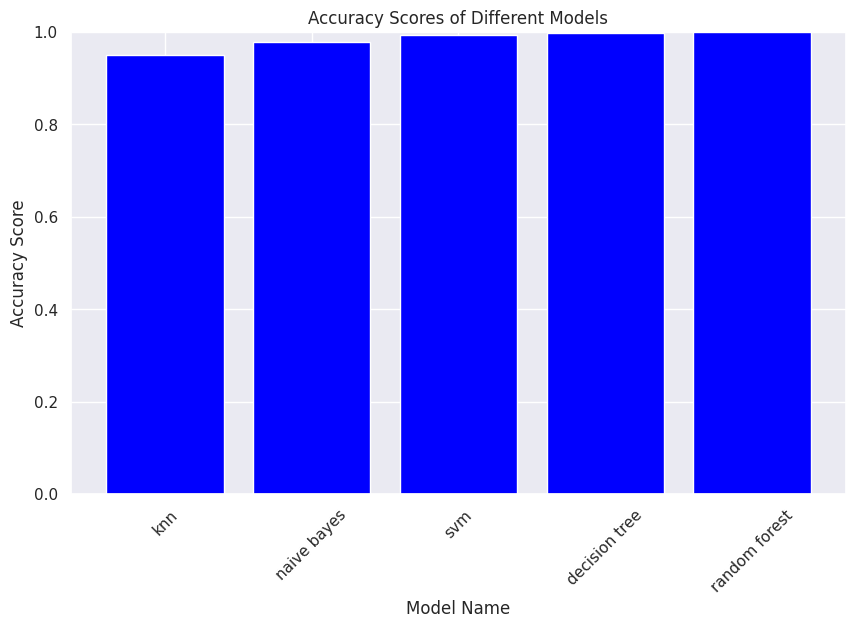

In [ ]:


model_names = ['knn', 'naive bayes', 'svm', 'decision tree', 'random forest']
accuracy_scores = [knn_score, naive_score, svm_score, tree_score, forest_score]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='blue')
plt.xlabel('Model Name')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy score
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


## **Prediction**

In [ ]:
prediction=knn.predict(scaler.transform([[3,92.11,245.96,1,0,5,1,0,30,0,2,44.99,0.18,59.9,0.31,5,300,250,48.43,3,5,39,3,2017,4,1,2017,8,3,1]]))
prediction

array([3], dtype=int32)

## **Saving The Model**

In [ ]:
import pickle

In [ ]:
pickle.dump(knn,open('supply_model.pkl','wb'))

In [ ]:
pickle_model=pickle.load(open('supply_model.pkl','rb'))

In [ ]:
pickle_model.predict(scaler.transform([[3,92.11,245.96,1,0,5,1,0,30,0,2,44.99,0.18,59.9,0.31,5,300,250,48.43,3,5,39,3,2017,4,1,2017,8,3,1]]))

array([3], dtype=int32)